In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the Training Data

In [2]:
train_df = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Reading the Testing Data

In [3]:
test_df = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# Dropping the Id's Column as they are not needed

In [4]:
train_df.drop('Id', axis=1, inplace=True)
test_df.drop('Id', axis=1, inplace=True)

# Combining both the Training and Testing dataframes

In [5]:
train_df = train_df.append(test_df)
train_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [6]:
train_df.reset_index(drop=True, inplace=True)

In [7]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

# Extracting the numerical features names

In [9]:
columns_objects = [key for key in dict(train_df.dtypes) if dict(train_df.dtypes)[key] in ['float64', 'int64']]

# Processing the Categorical Features

# Visulazing MSZoning feature with SalePrice to assign ranks for each category

<AxesSubplot:xlabel='MSZoning', ylabel='SalePrice'>

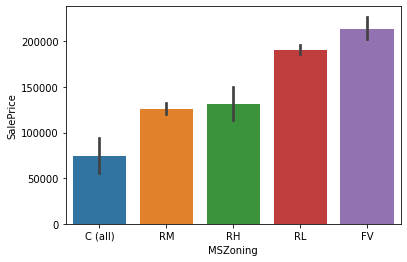

In [10]:
result = train_df.groupby(['MSZoning'])['SalePrice'].median().reset_index().sort_values('SalePrice')
sns.barplot(x='MSZoning', y='SalePrice', data=train_df, order=result['MSZoning'])

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

# Visualizing Neighborhood with SalePrice by Box Plot

<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

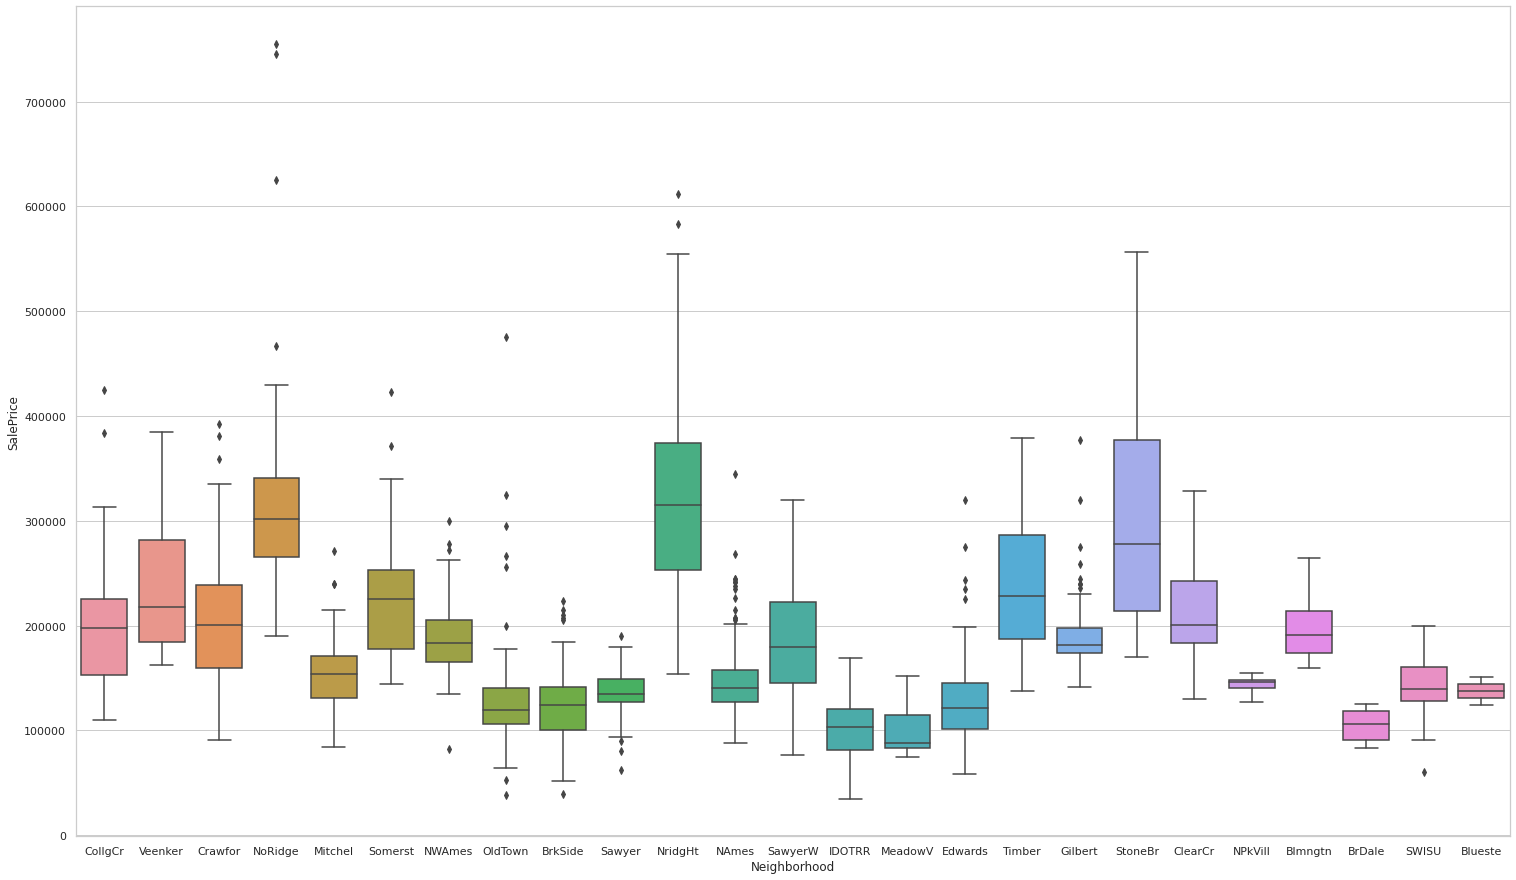

In [12]:
sns.set(rc={'figure.figsize':(25.7,15.27)})
sns.set_style("whitegrid")
sns.boxplot(x='Neighborhood', y='SalePrice', data=train_df)

# Visualizing Neighborhood feature with SalePrice by Bar Plot to assign ranks to each category

<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

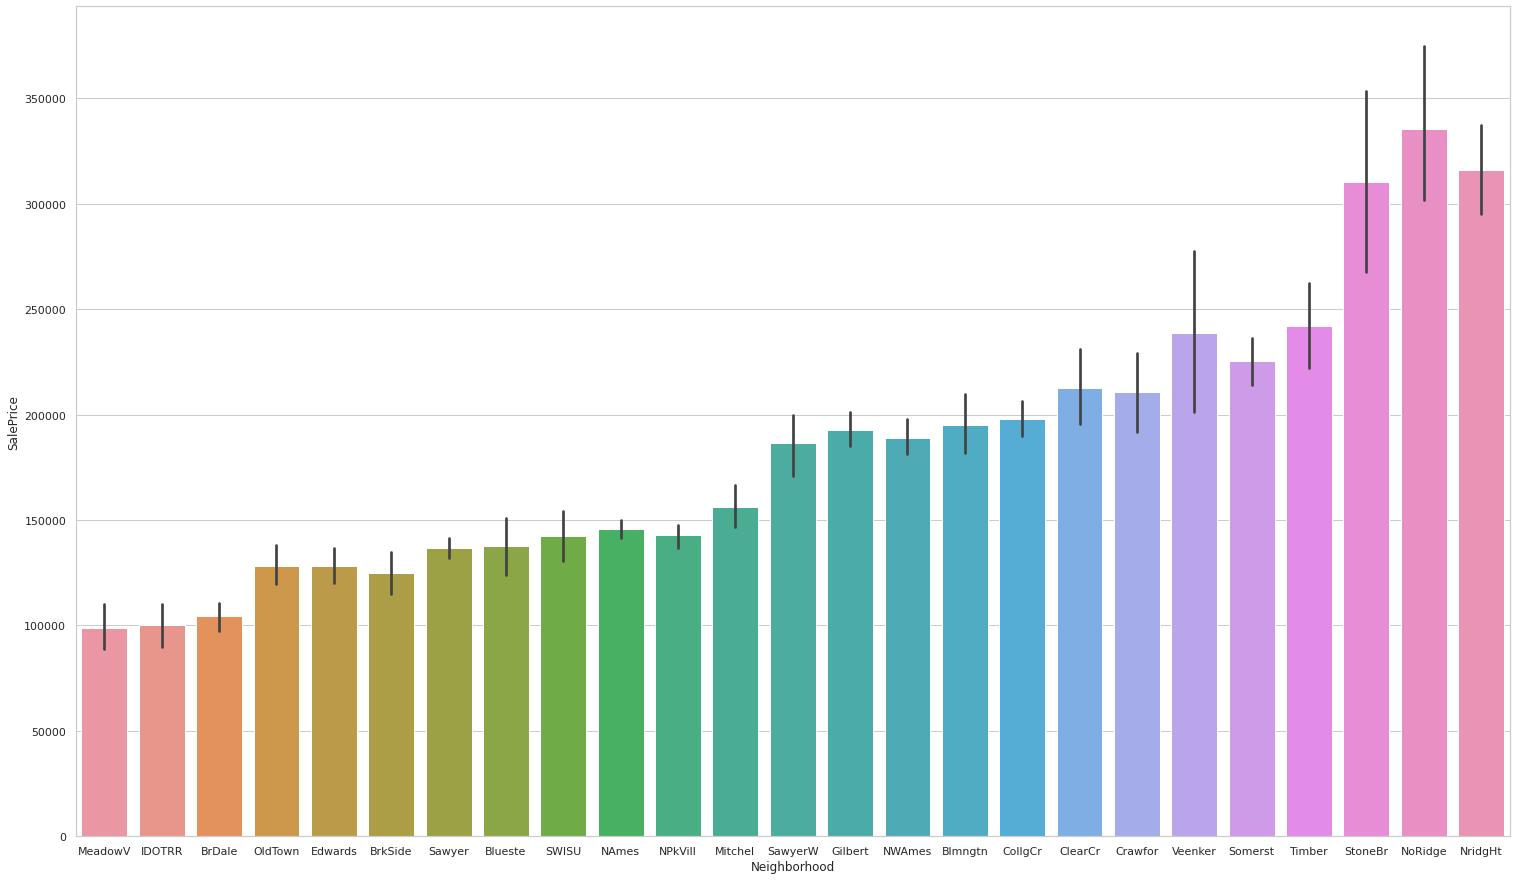

In [13]:
result = train_df.groupby(['Neighborhood'])['SalePrice'].median().reset_index().sort_values('SalePrice')
#norm = plt.Normalize(train_df['SalePrice'].values.min(), train_df['SalePrice'].values.max())
#colors = plt.cm.Reds(norm(train_df['SalePrice']))
sns.barplot(x='Neighborhood', y="SalePrice", data=train_df, order=result['Neighborhood'])

In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

# Visualizing Exterior1st feature with SalePrice by Bar Plot to assign ranks to each category

<AxesSubplot:xlabel='Exterior1st', ylabel='SalePrice'>

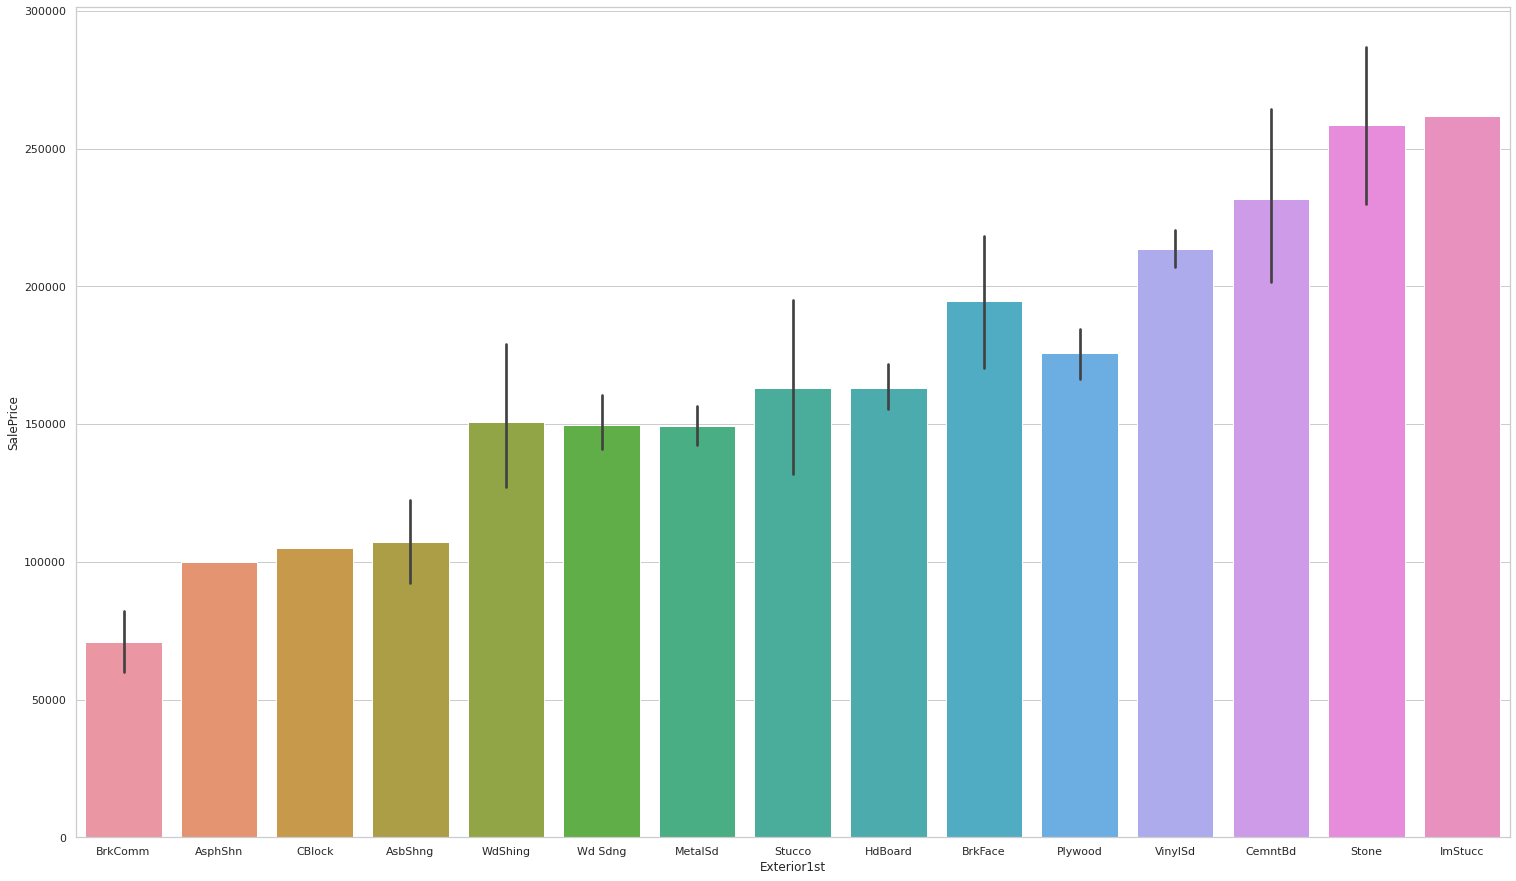

In [15]:
result = train_df.groupby(['Exterior1st'])['SalePrice'].median().reset_index().sort_values('SalePrice')
sns.barplot(x='Exterior1st', y='SalePrice', data=train_df, order=result['Exterior1st'])

# Visualizing Exterior2nd feature with SalePrice by Bar Plot to assign ranks to each category

<AxesSubplot:xlabel='Exterior2nd', ylabel='SalePrice'>

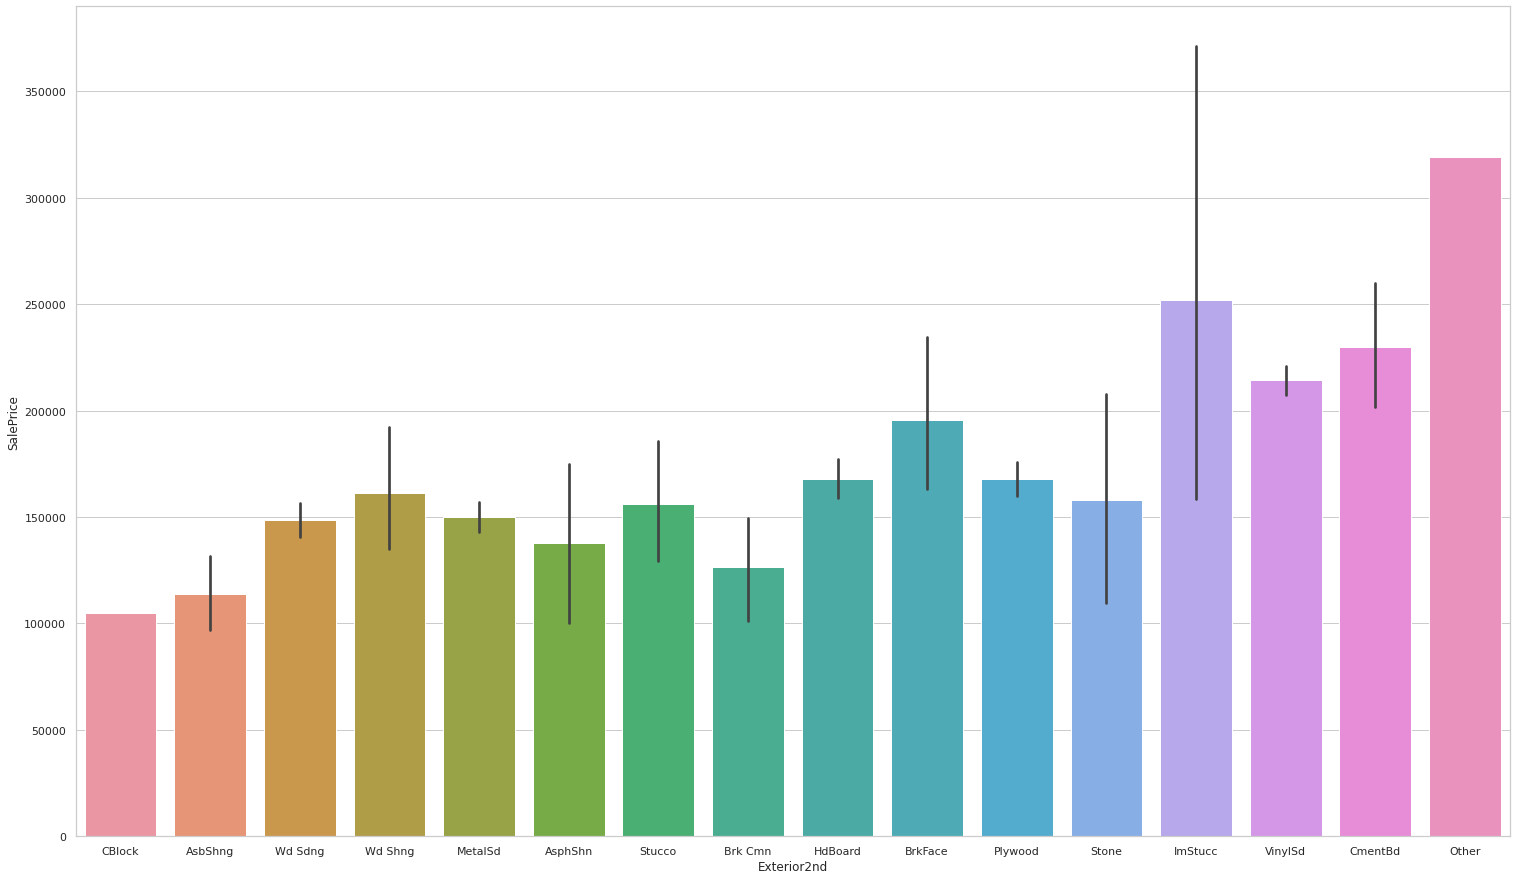

In [16]:
result = train_df.groupby(['Exterior2nd'])['SalePrice'].median().reset_index().sort_values('SalePrice')
sns.barplot(x='Exterior2nd', y='SalePrice', data=train_df, order=result['Exterior2nd'])

# Visualizing RoofStyle feature with SalePrice by Bar Plot to assign ranks to each category

<AxesSubplot:xlabel='RoofStyle', ylabel='SalePrice'>

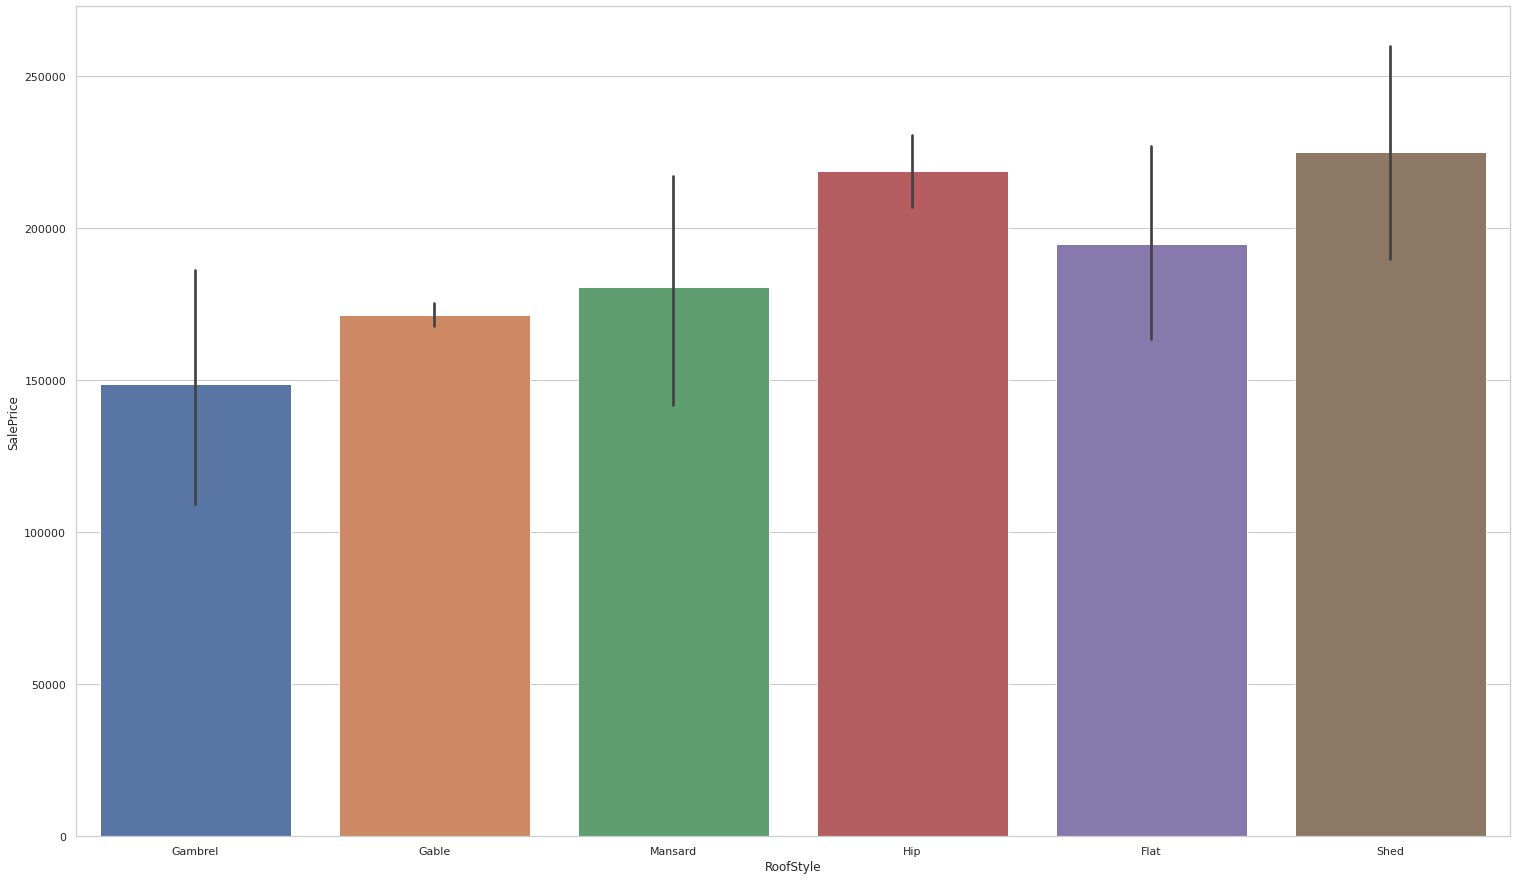

In [17]:
result = train_df.groupby(['RoofStyle'])['SalePrice'].median().reset_index().sort_values('SalePrice')
sns.barplot(x='RoofStyle', y='SalePrice', data=train_df, order=result['RoofStyle'])

# Visualizing RoofMatl feature with SalePrice by Bar Plot to assign ranks to each category

<AxesSubplot:xlabel='RoofMatl', ylabel='SalePrice'>

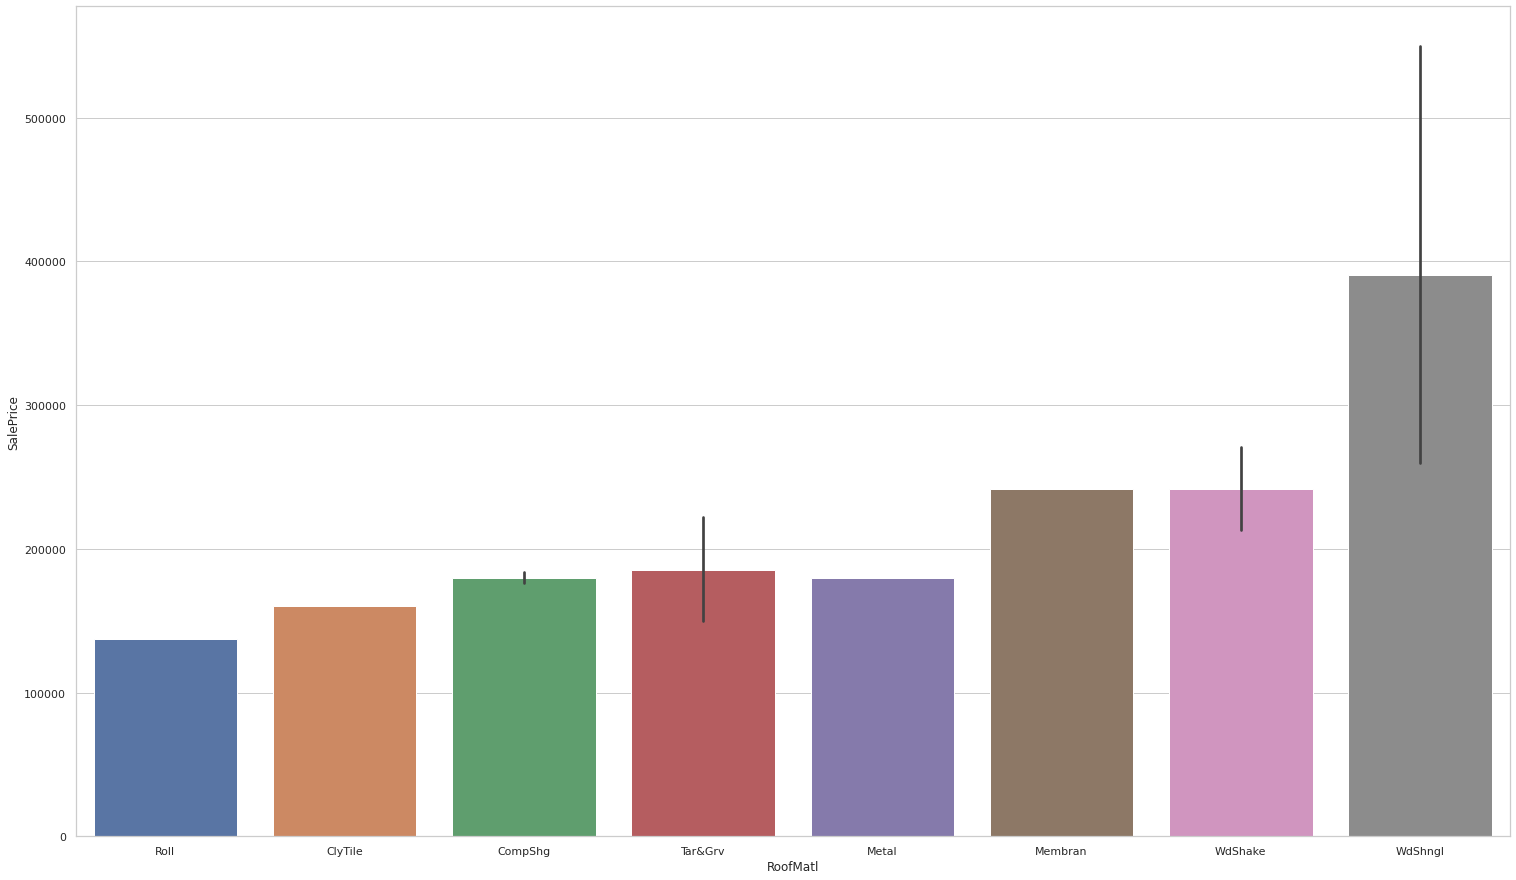

In [18]:
result = train_df.groupby(['RoofMatl'])['SalePrice'].median().reset_index().sort_values('SalePrice')
sns.barplot(x='RoofMatl', y='SalePrice', data=train_df, order=result['RoofMatl'])

# Visualizing MasVnrType feature with SalePrice by Bar Plot to assign ranks to each category

<AxesSubplot:xlabel='MasVnrType', ylabel='SalePrice'>

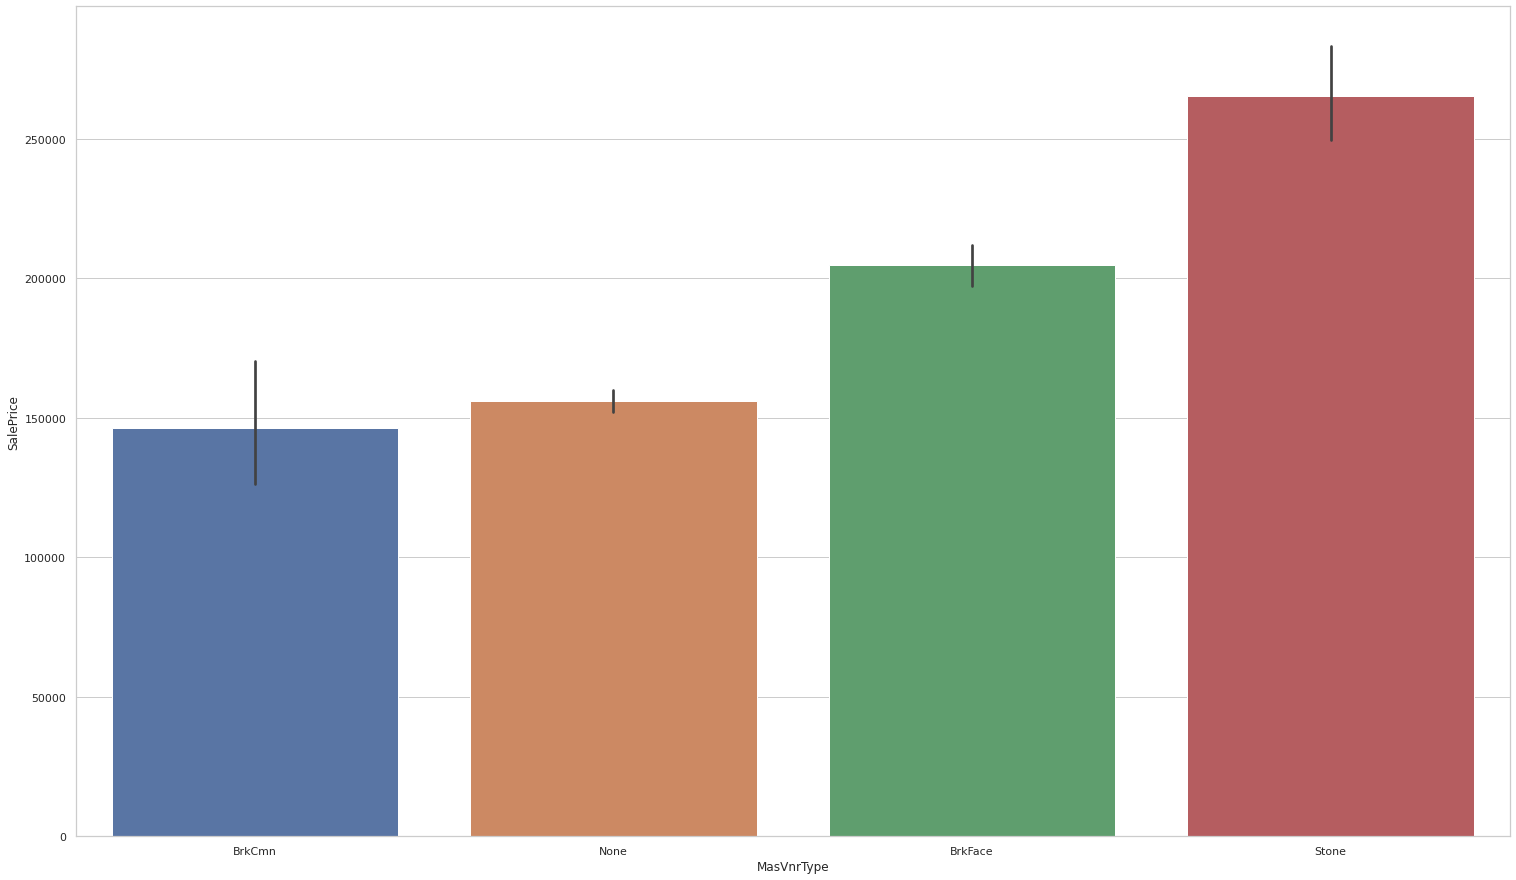

In [19]:
result = train_df.groupby(['MasVnrType'])['SalePrice'].median().reset_index().sort_values('SalePrice')
sns.barplot(x='MasVnrType', y='SalePrice', data=train_df, order=result['MasVnrType'])

# Visualizing LotConfig feature with SalePrice by Bar Plot to assign ranks to each category

<AxesSubplot:xlabel='LotConfig', ylabel='SalePrice'>

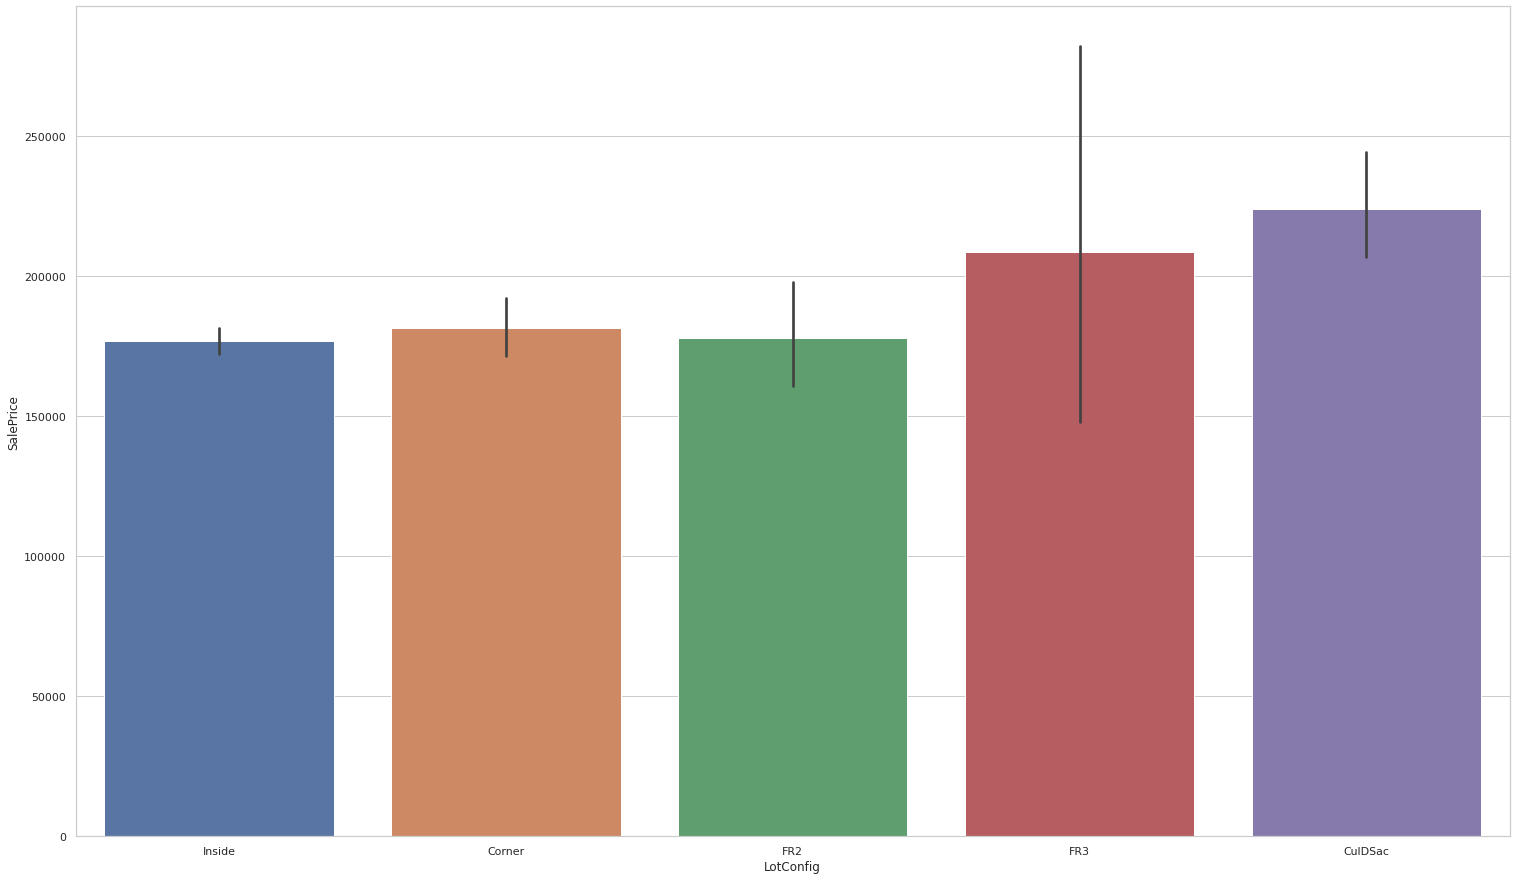

In [20]:
result = train_df.groupby(['LotConfig'])['SalePrice'].median().reset_index().sort_values('SalePrice')
sns.barplot(x='LotConfig', y='SalePrice', data=train_df, order=result['LotConfig'])

# Visualizing Condition1 feature with SalePrice by Bar Plot to assign ranks to each category

<AxesSubplot:xlabel='Condition1', ylabel='SalePrice'>

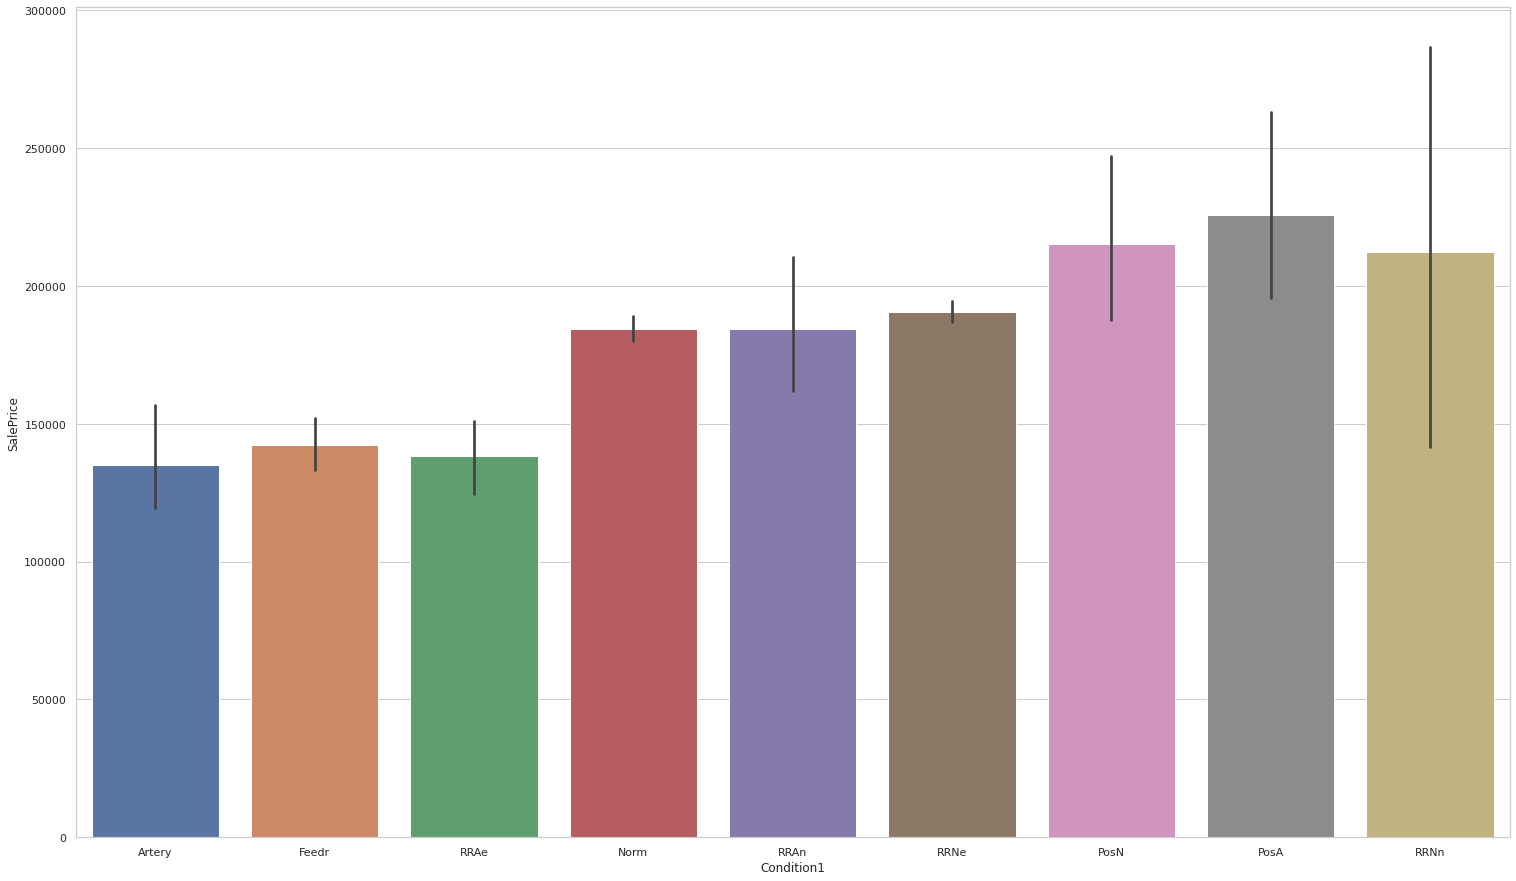

In [21]:
result = train_df.groupby(['Condition1'])['SalePrice'].median().reset_index().sort_values('SalePrice')
sns.barplot(x='Condition1', y='SalePrice', data=train_df, order=result['Condition1'])

# Visualizing LandContour feature with SalePrice by Bar Plot to assign ranks to each category

<AxesSubplot:xlabel='LandContour', ylabel='SalePrice'>

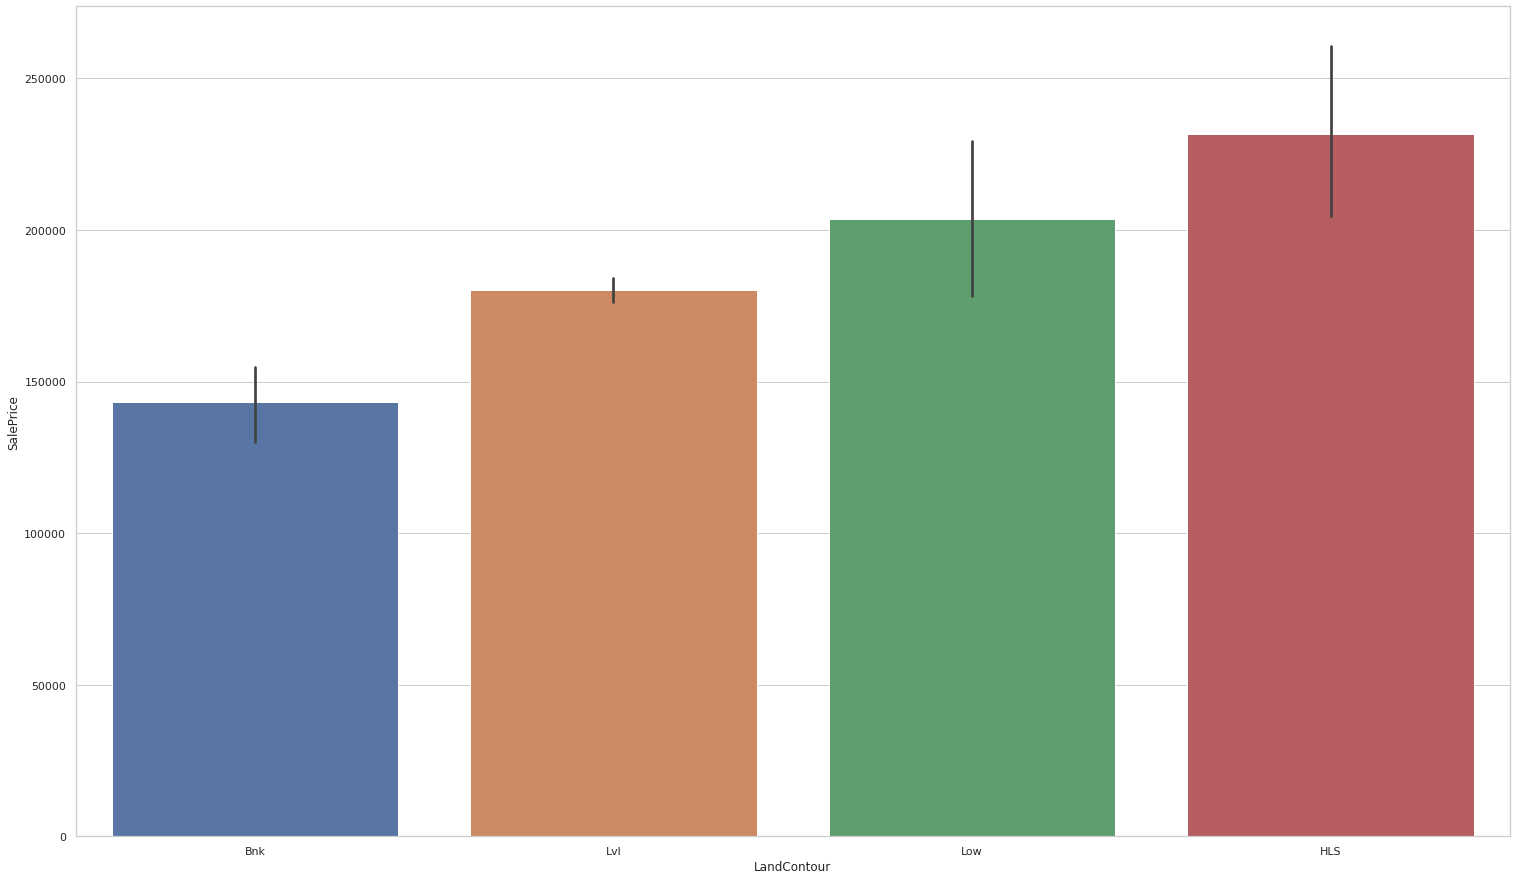

In [22]:
result = train_df.groupby(['LandContour'])['SalePrice'].median().reset_index().sort_values('SalePrice')
sns.barplot(x='LandContour', y='SalePrice', data=train_df, order=result['LandContour'])

# Visualizing Condition2 feature with SalePrice by Bar Plot to assign ranks to each category

<AxesSubplot:xlabel='Condition2', ylabel='SalePrice'>

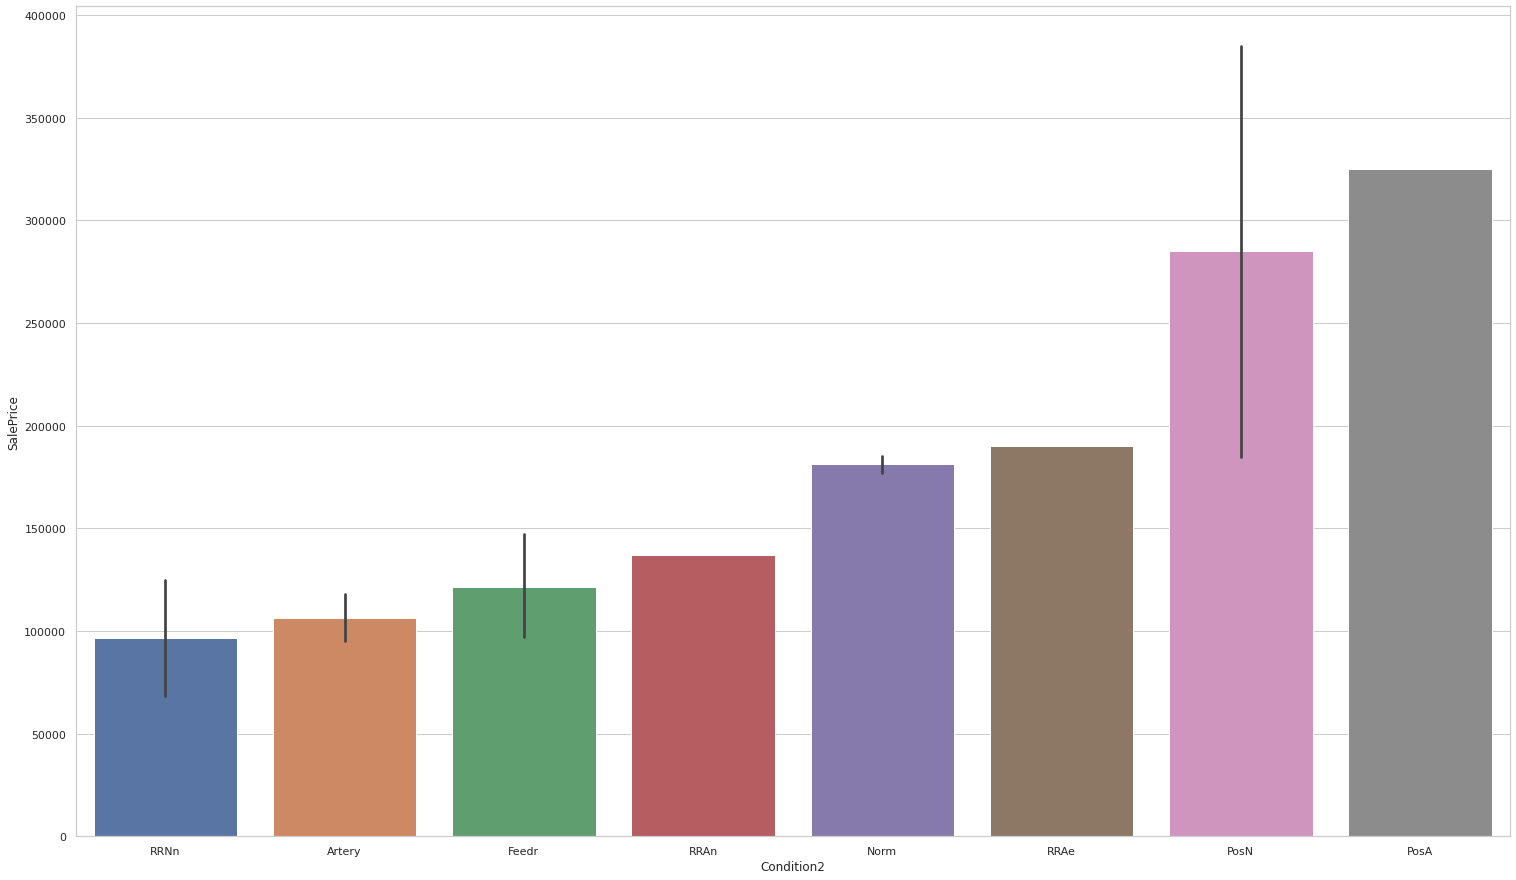

In [23]:
result = train_df.groupby(['Condition2'])['SalePrice'].median().reset_index().sort_values('SalePrice')
sns.barplot(x='Condition2', y='SalePrice', data=train_df, order=result['Condition2'])

# Visualizing Foundation feature with SalePrice by Bar Plot to assign ranks to each category

<AxesSubplot:xlabel='Foundation', ylabel='SalePrice'>

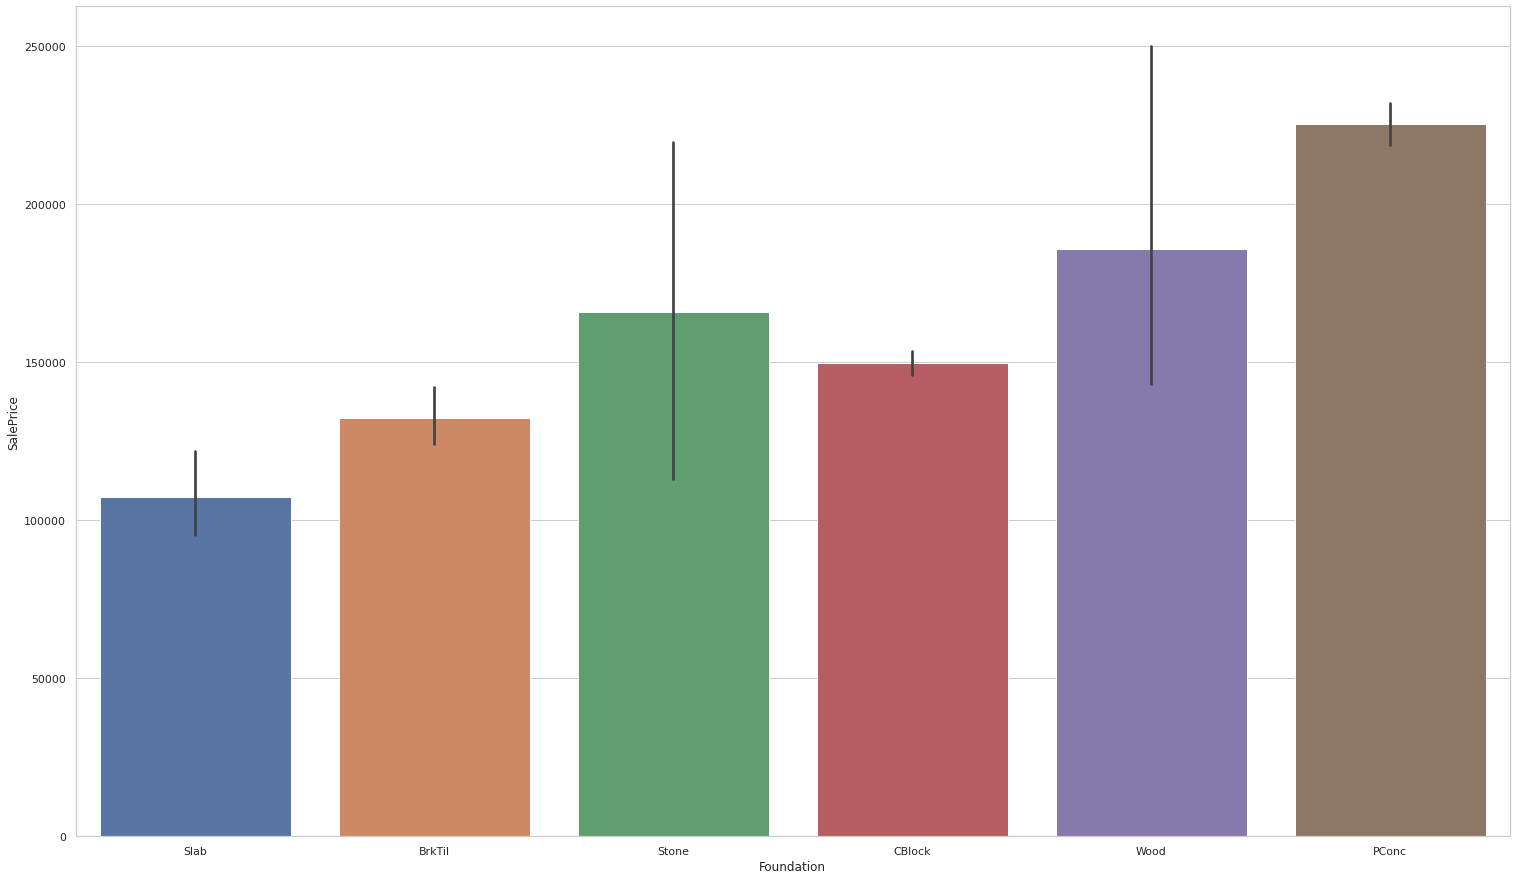

In [24]:
result = train_df.groupby(['Foundation'])['SalePrice'].median().reset_index().sort_values('SalePrice')
sns.barplot(x='Foundation', y='SalePrice', data=train_df, order=result['Foundation'])

# Visualizing SaleCondition feature with SalePrice by Bar Plot to assign ranks to each category

<AxesSubplot:xlabel='SaleCondition', ylabel='SalePrice'>

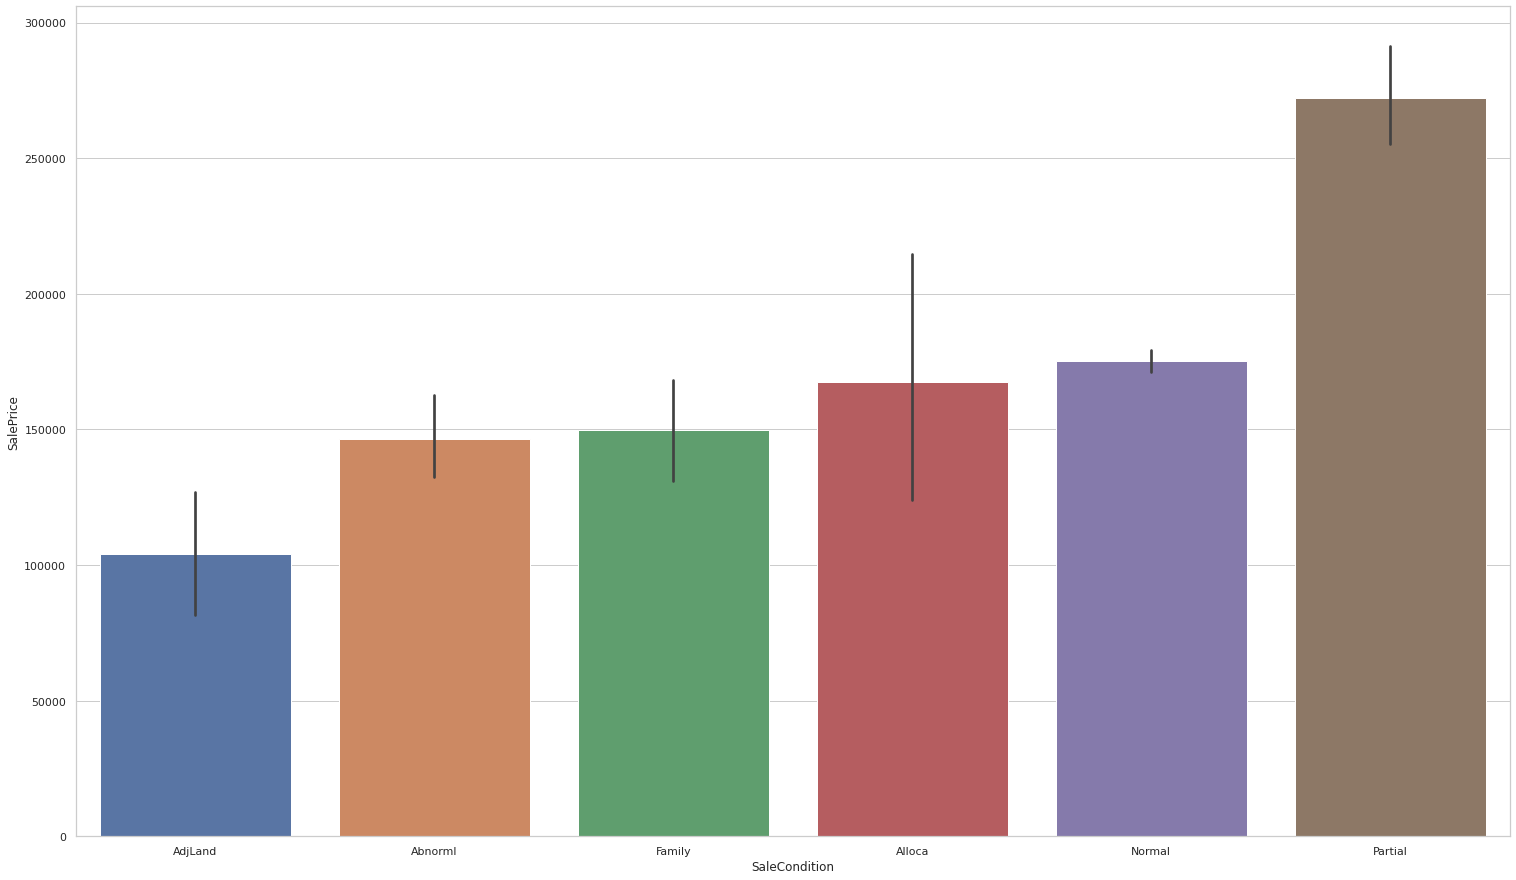

In [25]:
result = train_df.groupby(['SaleCondition'])['SalePrice'].median().reset_index().sort_values('SalePrice')
sns.barplot(x='SaleCondition', y='SalePrice', data=train_df, order=result['SaleCondition'])

# Visualizing SaleType feature with SalePrice by Bar Plot to assign ranks to each category

<AxesSubplot:xlabel='SaleType', ylabel='SalePrice'>

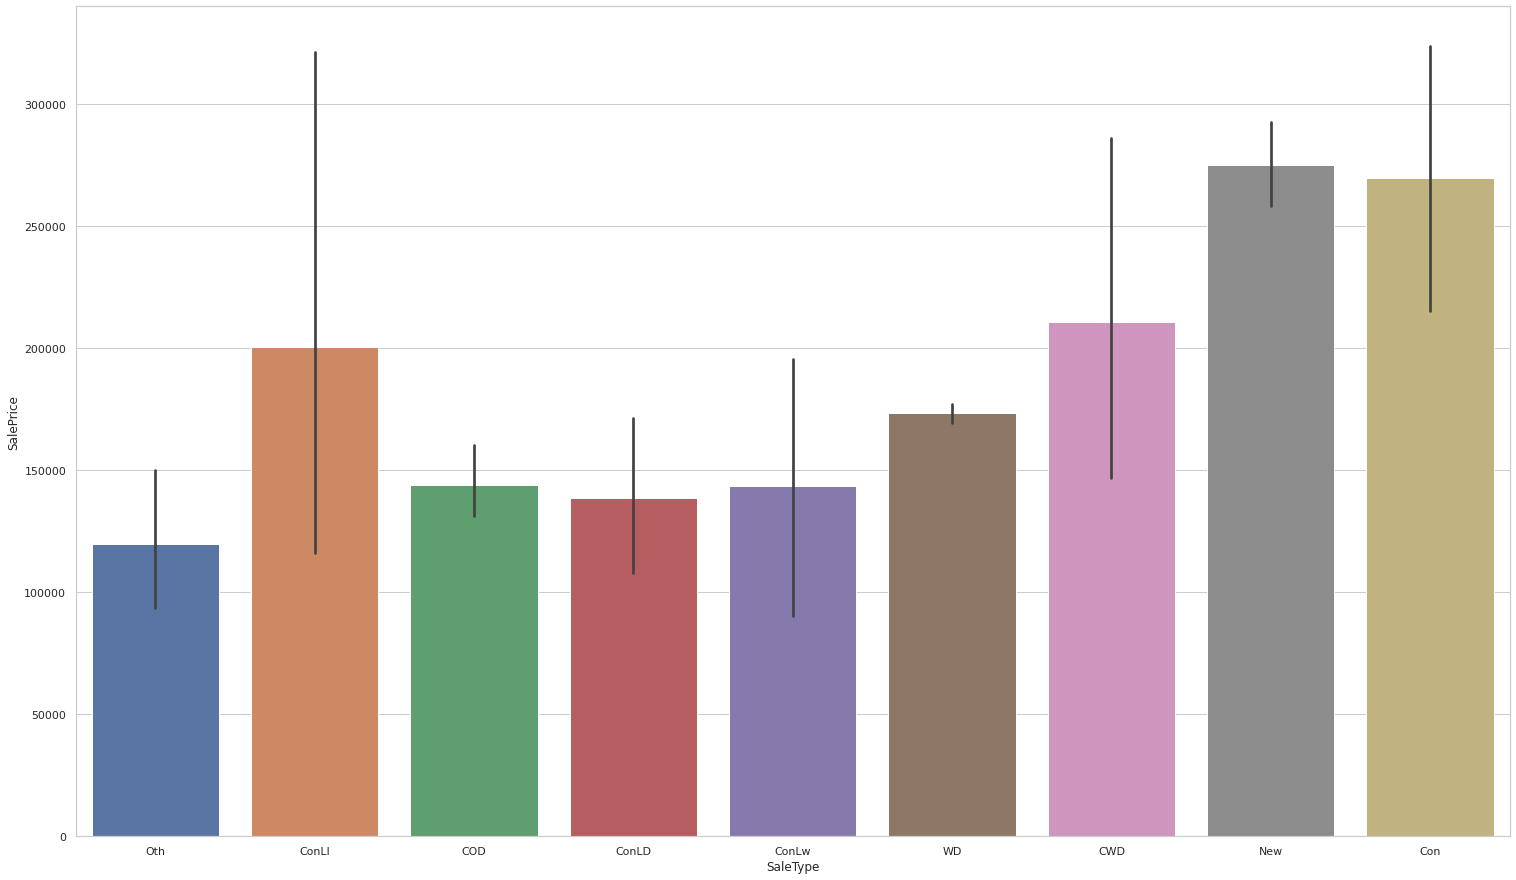

In [26]:
result = train_df.groupby(['SaleType'])['SalePrice'].median().reset_index().sort_values('SalePrice')
sns.barplot(x='SaleType', y='SalePrice', data=train_df, order=result['SaleType'])

# Visualizing MiscFeature feature with SalePrice by Bar Plot to assign ranks to each category

<AxesSubplot:xlabel='MiscFeature', ylabel='SalePrice'>

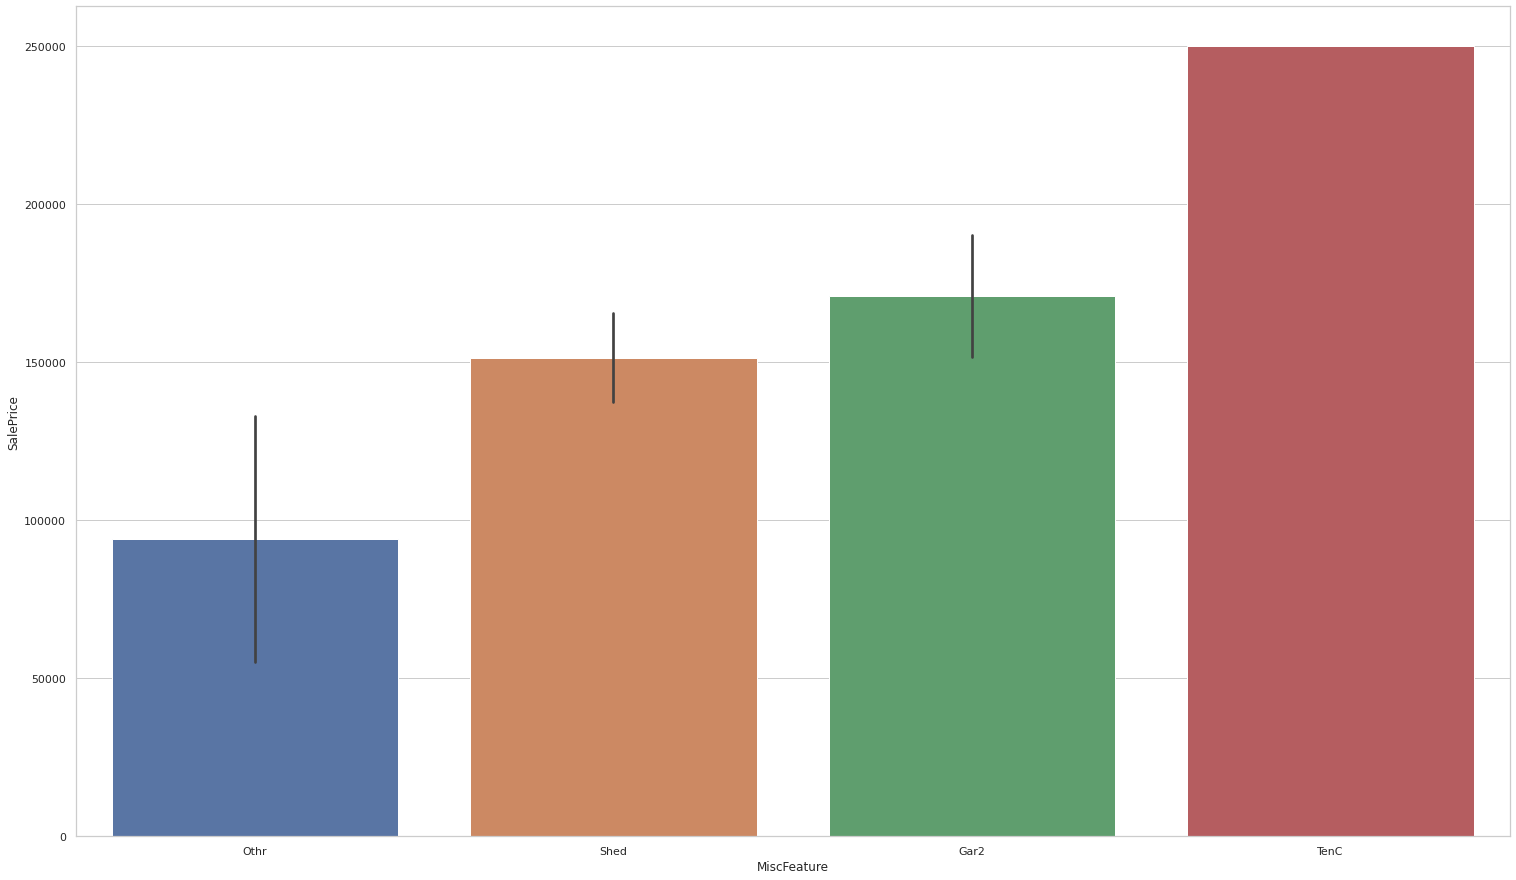

In [27]:
result = train_df.groupby(['MiscFeature'])['SalePrice'].median().reset_index().sort_values('SalePrice')
sns.barplot(x='MiscFeature', y='SalePrice', data=train_df, order=result['MiscFeature'])

# Visualizing Fence feature with SalePrice by Bar Plot to assign ranks to each category

<AxesSubplot:xlabel='Fence', ylabel='SalePrice'>

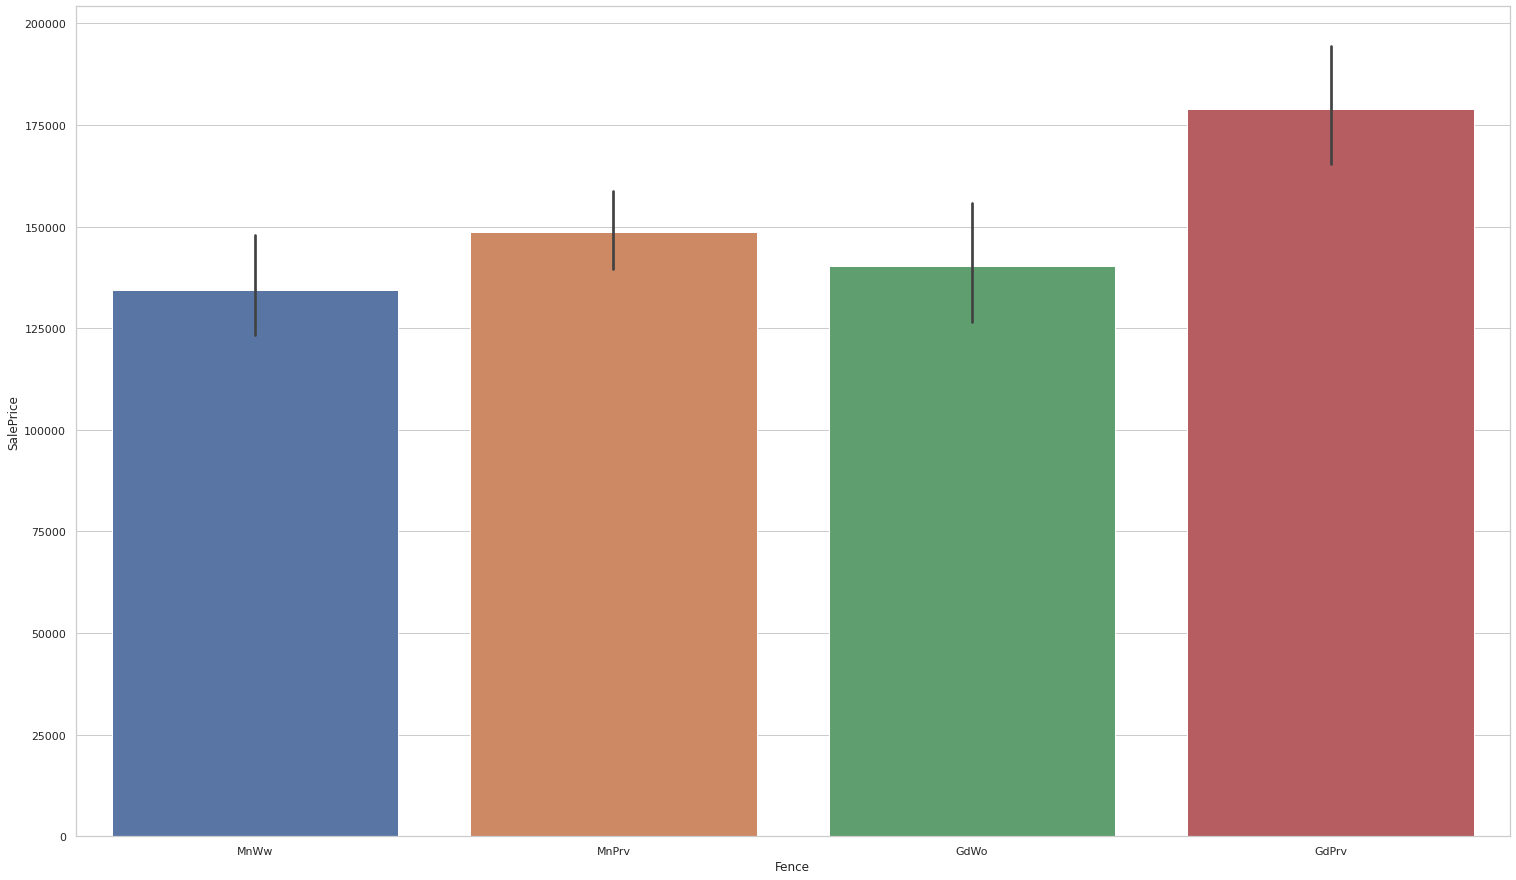

In [28]:
result = train_df.groupby(['Fence'])['SalePrice'].median().reset_index().sort_values('SalePrice')
sns.barplot(x='Fence', y='SalePrice', data=train_df, order=result['Fence'])

# Visualizing PavedDrive feature with SalePrice by Bar Plot to assign ranks to each category

<AxesSubplot:xlabel='PavedDrive', ylabel='SalePrice'>

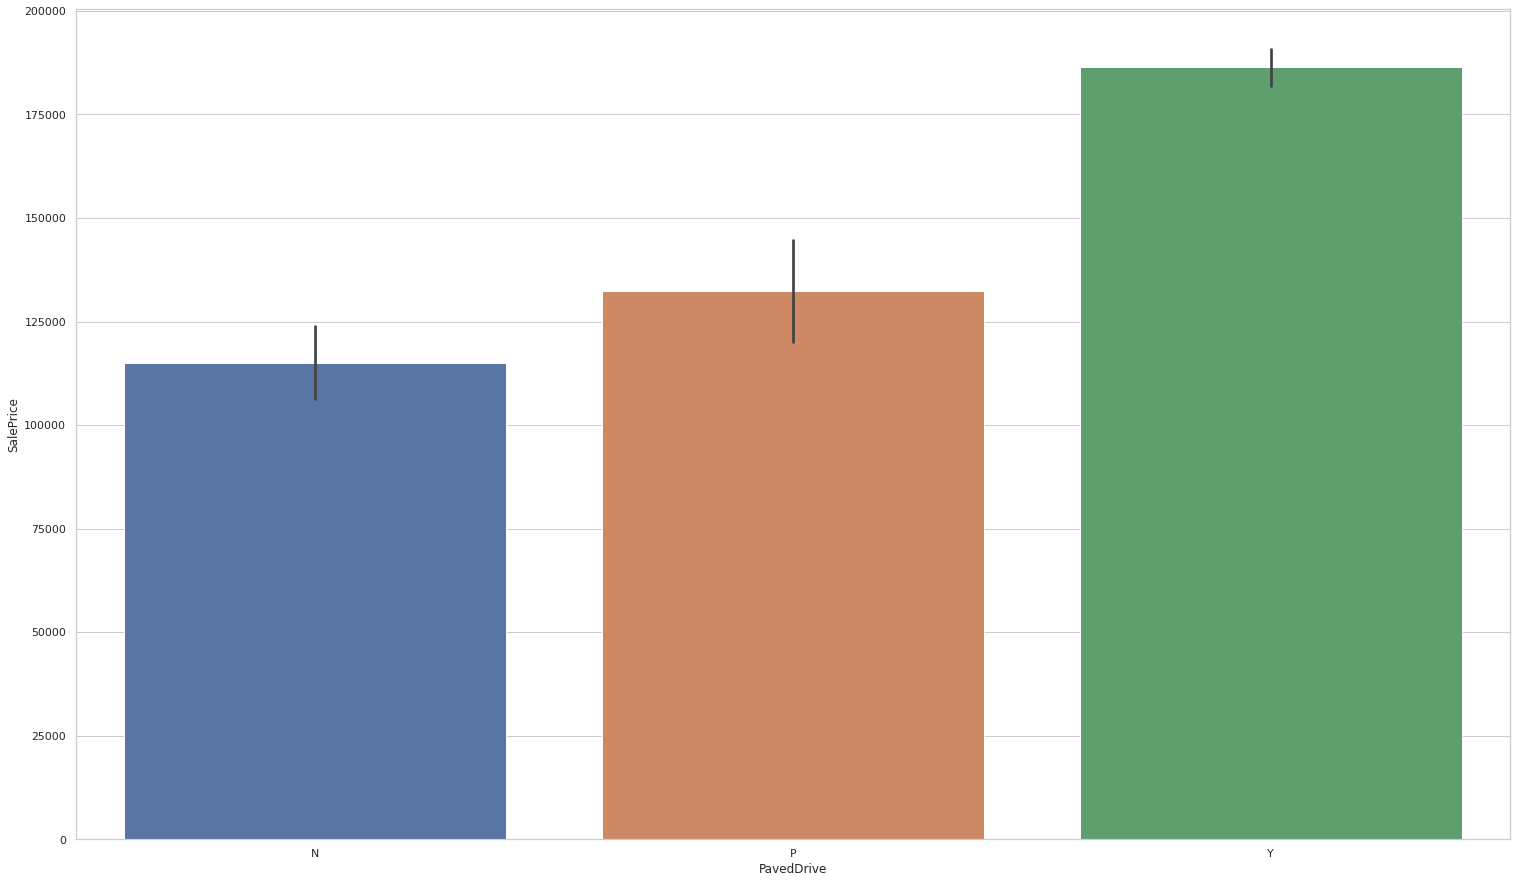

In [29]:
result = train_df.groupby(['PavedDrive'])['SalePrice'].median().reset_index().sort_values('SalePrice')
sns.barplot(x='PavedDrive', y='SalePrice', data=train_df, order=result['PavedDrive'])

# Visualizing GarageFinish feature with SalePrice by Bar Plot to assign ranks to each category

<AxesSubplot:xlabel='GarageFinish', ylabel='SalePrice'>

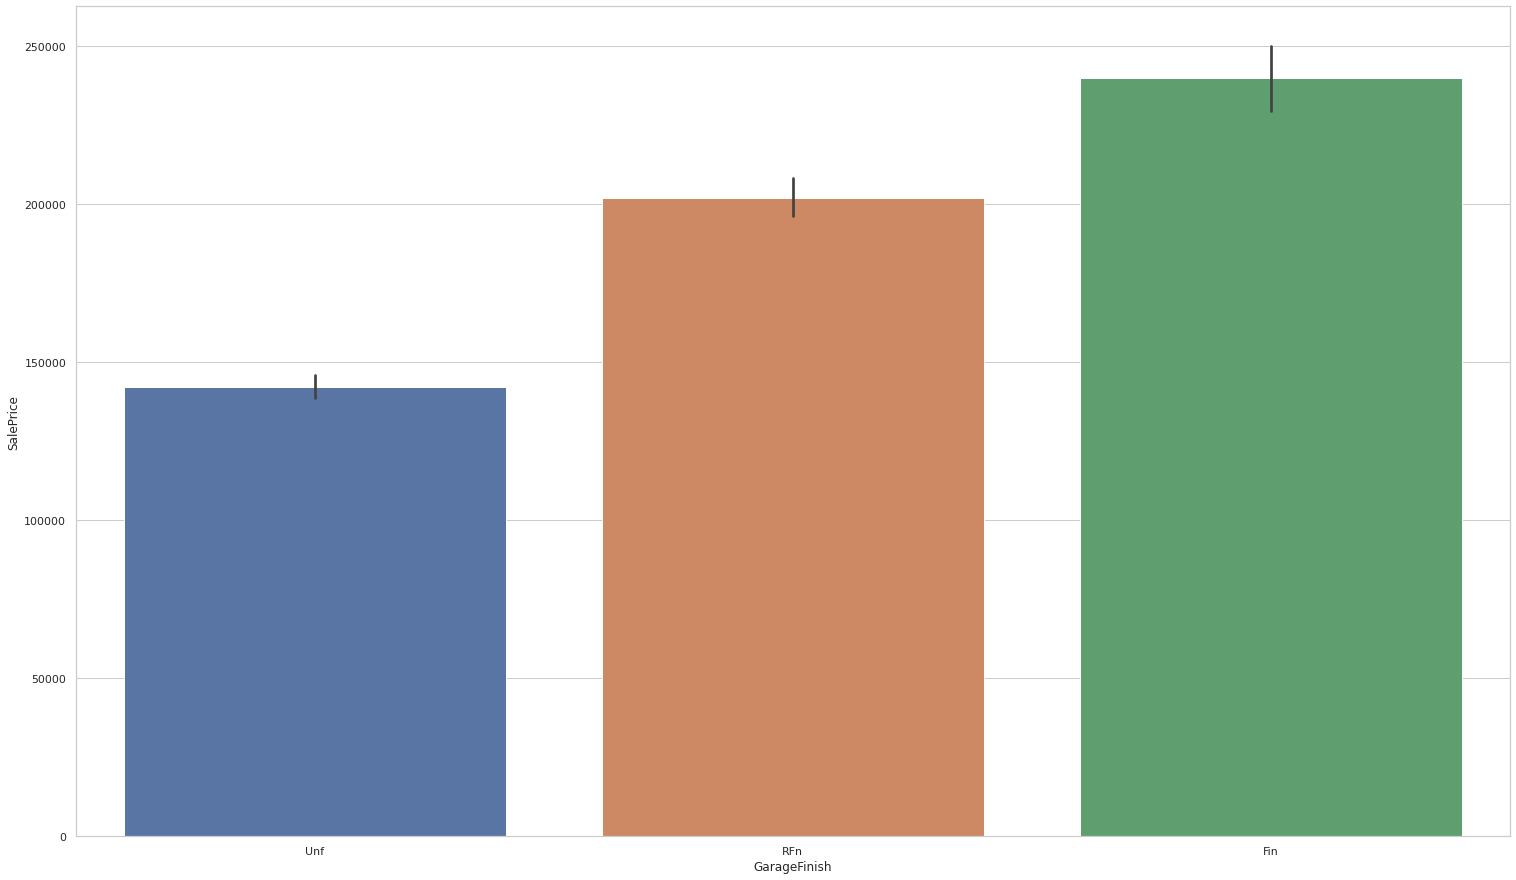

In [30]:
result = train_df.groupby(['GarageFinish'])['SalePrice'].median().reset_index().sort_values('SalePrice')
sns.barplot(x='GarageFinish', y='SalePrice', data=train_df, order=result['GarageFinish'])

# Visualizing GarageType feature with SalePrice by Bar Plot to assign ranks to each category

<AxesSubplot:xlabel='GarageType', ylabel='SalePrice'>

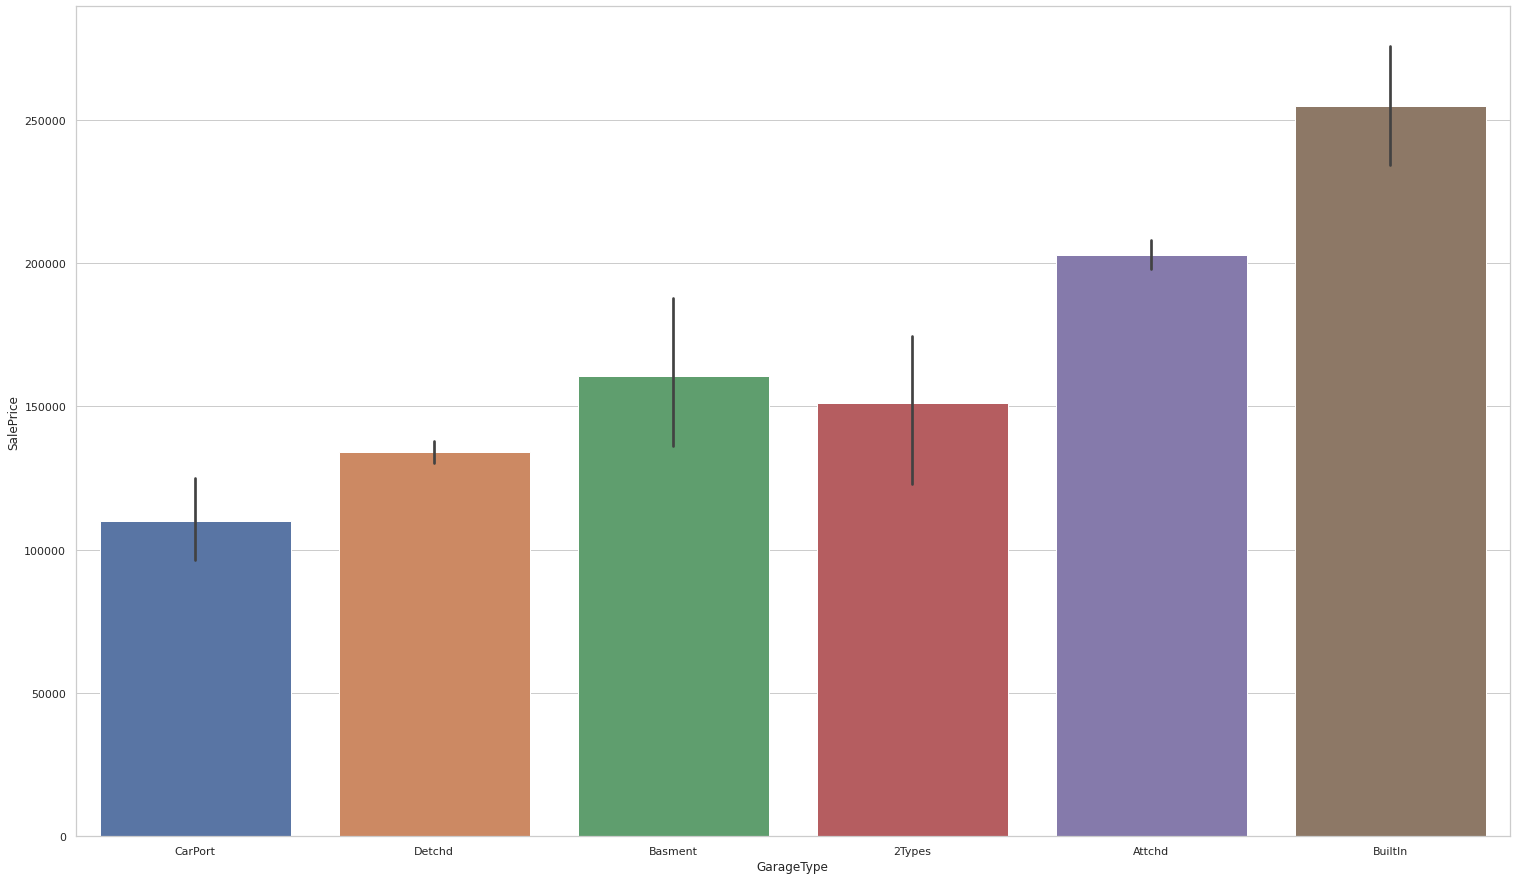

In [31]:
result = train_df.groupby(['GarageType'])['SalePrice'].median().reset_index().sort_values('SalePrice')
sns.barplot(x='GarageType', y='SalePrice', data=train_df, order=result['GarageType'])

# Visualizing Functional feature with SalePrice by Bar Plot to assign ranks to each category

<AxesSubplot:xlabel='Functional', ylabel='SalePrice'>

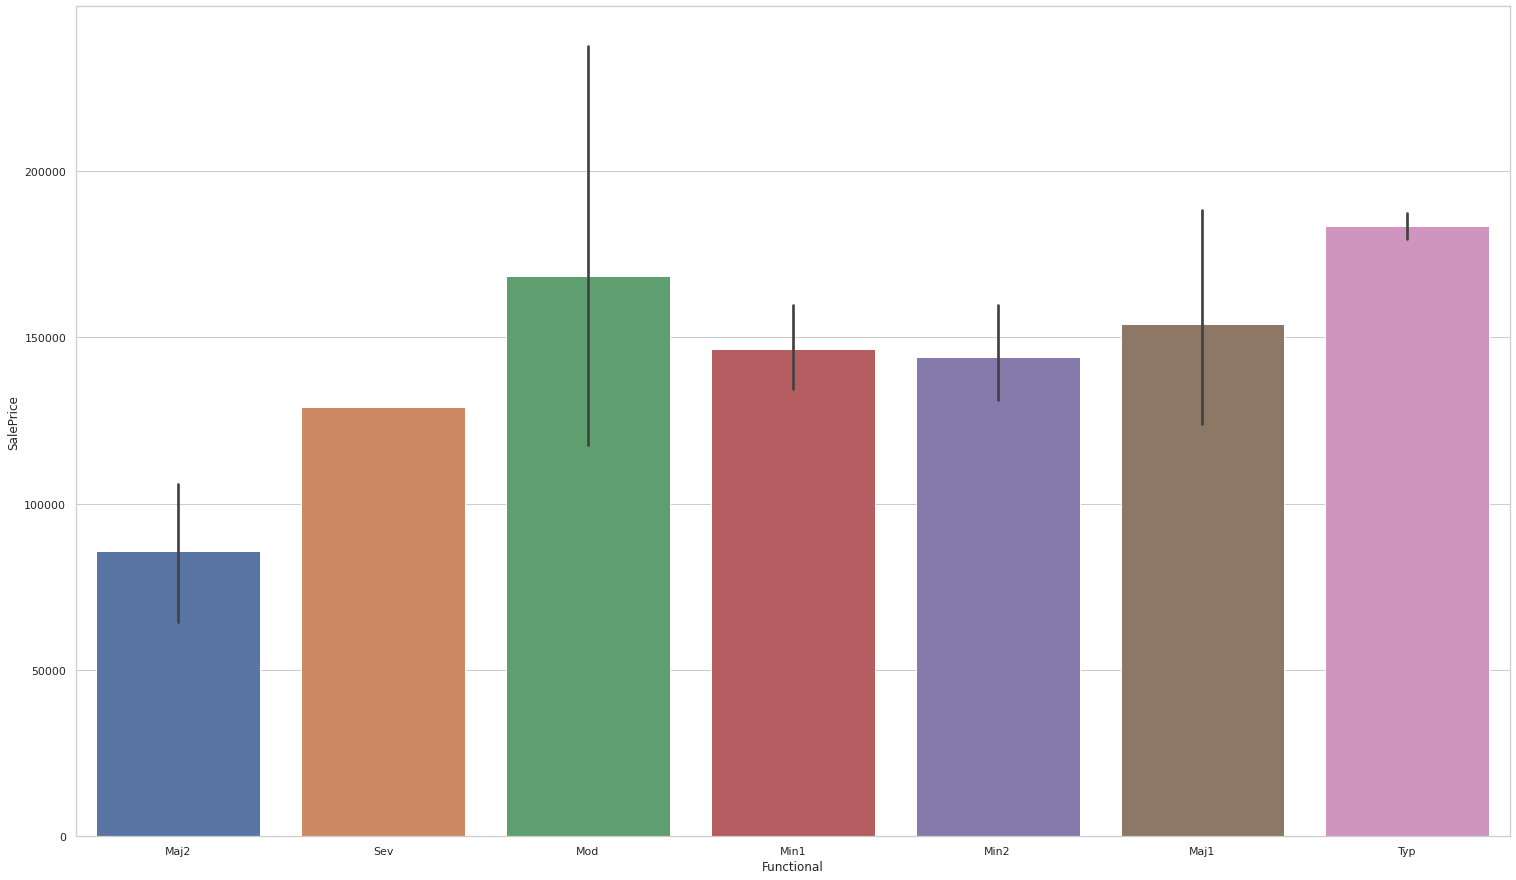

In [32]:
result = train_df.groupby(['Functional'])['SalePrice'].median().reset_index().sort_values('SalePrice')
sns.barplot(x='Functional', y='SalePrice', data=train_df, order=result['Functional'])

# Visualizing Electrical feature with SalePrice by Bar Plot to assign ranks to each category

<AxesSubplot:xlabel='Electrical', ylabel='SalePrice'>

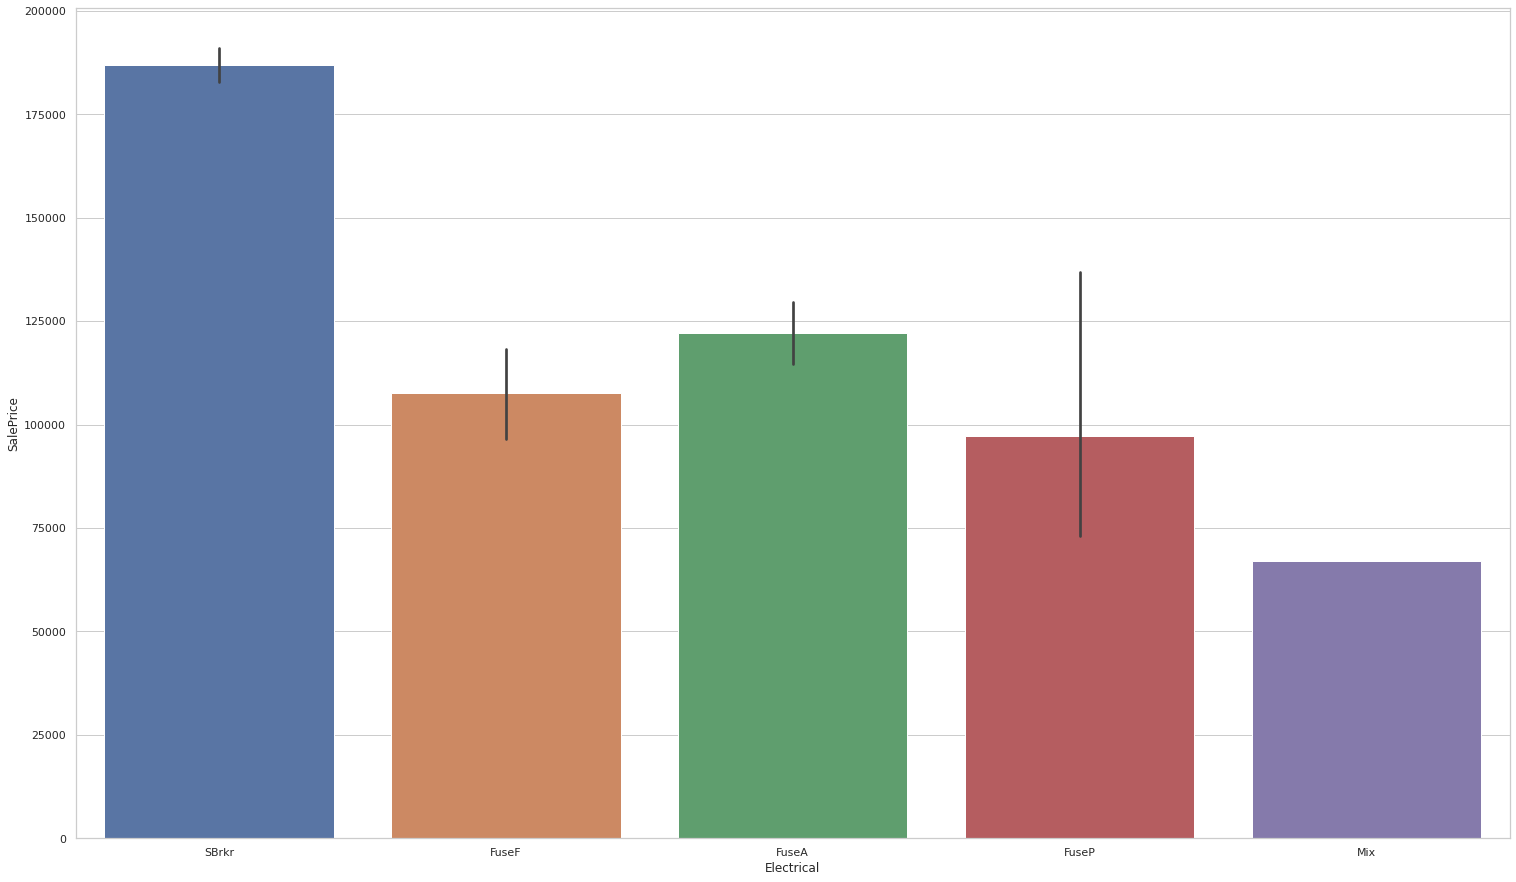

In [33]:
sns.barplot(x='Electrical', y='SalePrice', data=train_df)

# Visualizing Heating feature with SalePrice by Bar Plot to assign ranks to each category

<AxesSubplot:xlabel='Heating', ylabel='SalePrice'>

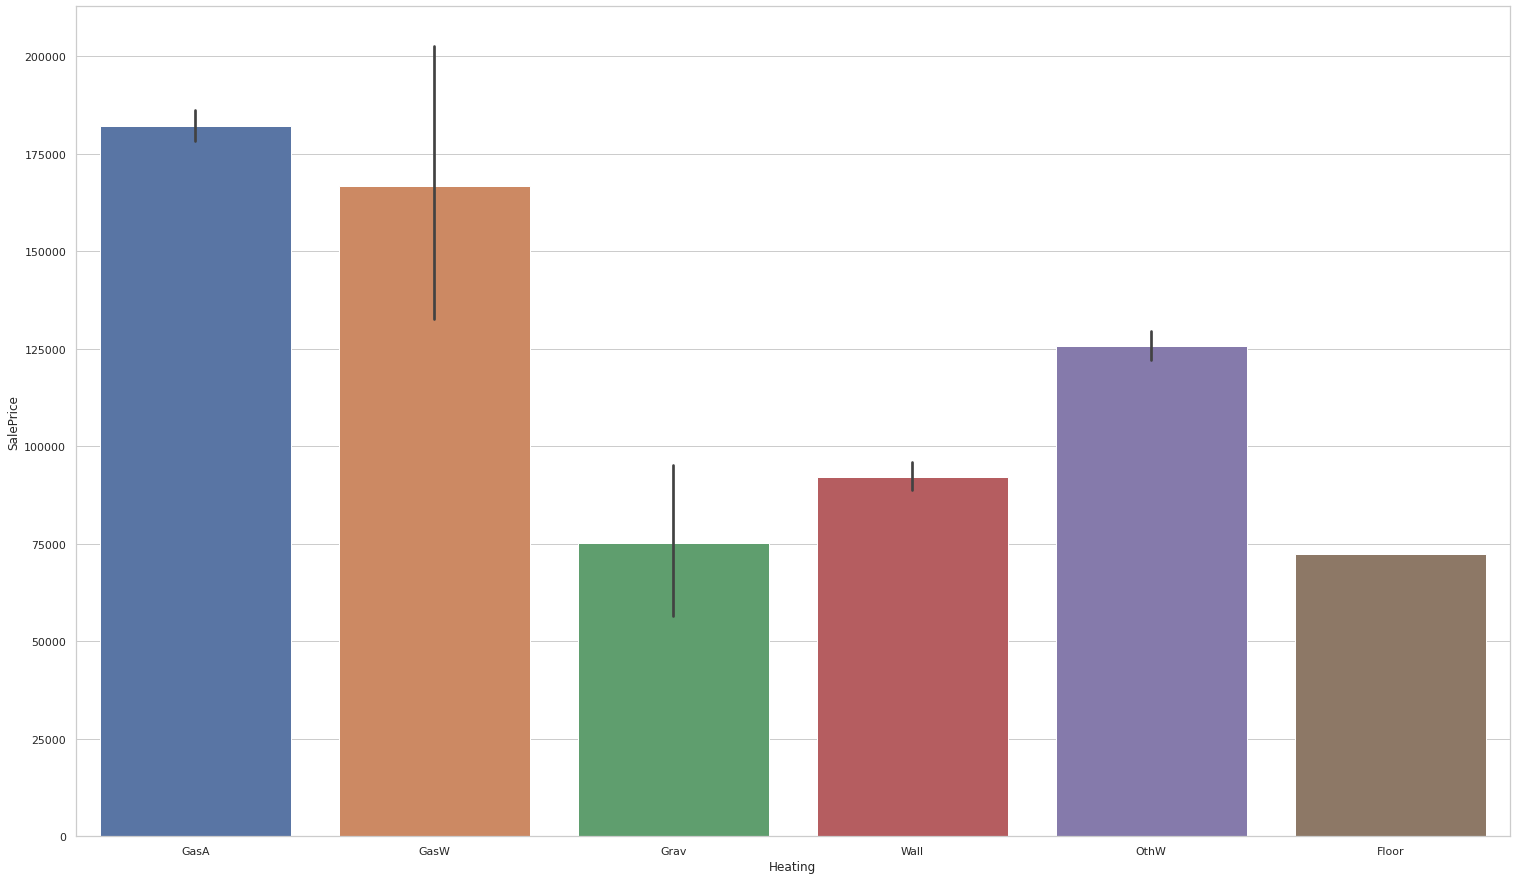

In [34]:
sns.barplot(x='Heating', y='SalePrice', data=train_df)

# Visualizing RoofMatl feature with SalePrice by Bar Plot to assign ranks to each category

<AxesSubplot:xlabel='RoofMatl', ylabel='SalePrice'>

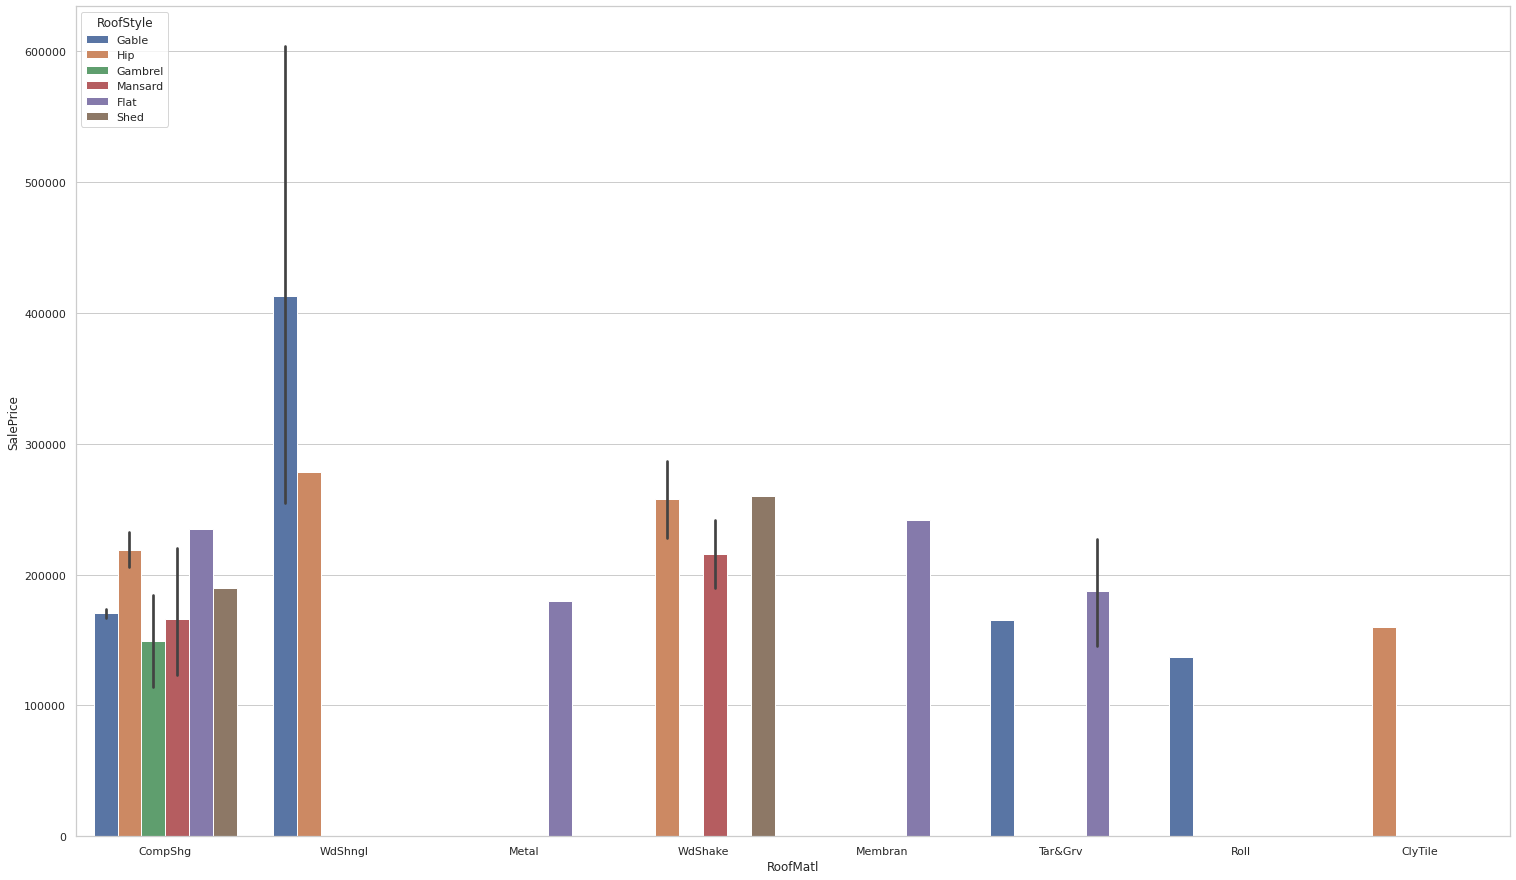

In [35]:
sns.barplot(x='RoofMatl', y='SalePrice', data=train_df, hue='RoofStyle')

# Visualizing RoofStyle feature with SalePrice by Bar Plot to assign ranks to each category

<AxesSubplot:xlabel='RoofStyle', ylabel='SalePrice'>

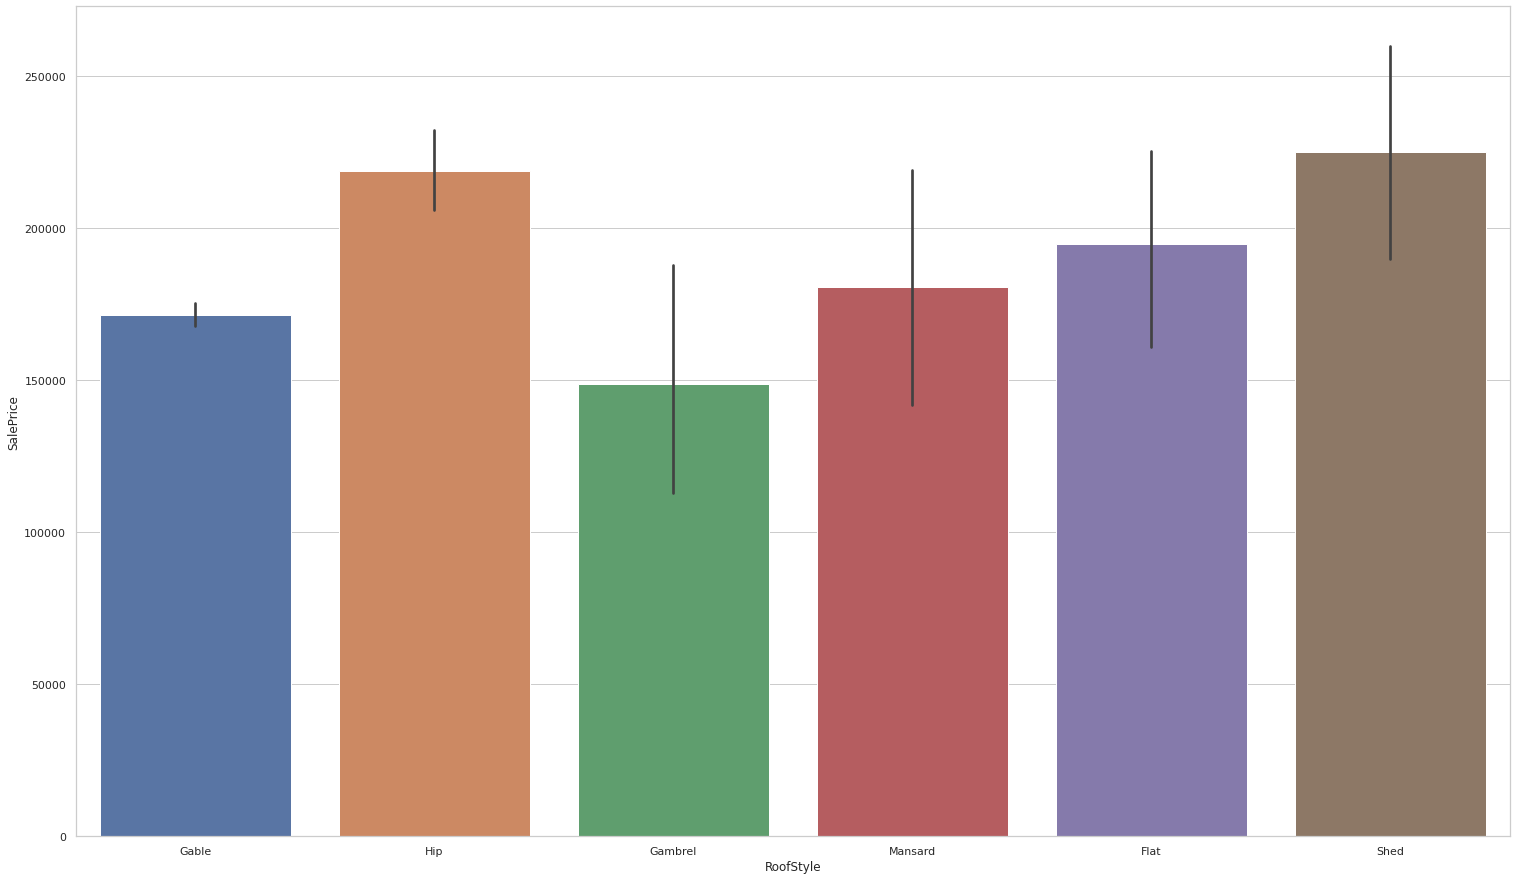

In [36]:
sns.barplot(x='RoofStyle', y='SalePrice', data=train_df)

# Visualizing LandSlope feature with SalePrice by Bar Plot to assign ranks to each category

<AxesSubplot:xlabel='LandSlope', ylabel='SalePrice'>

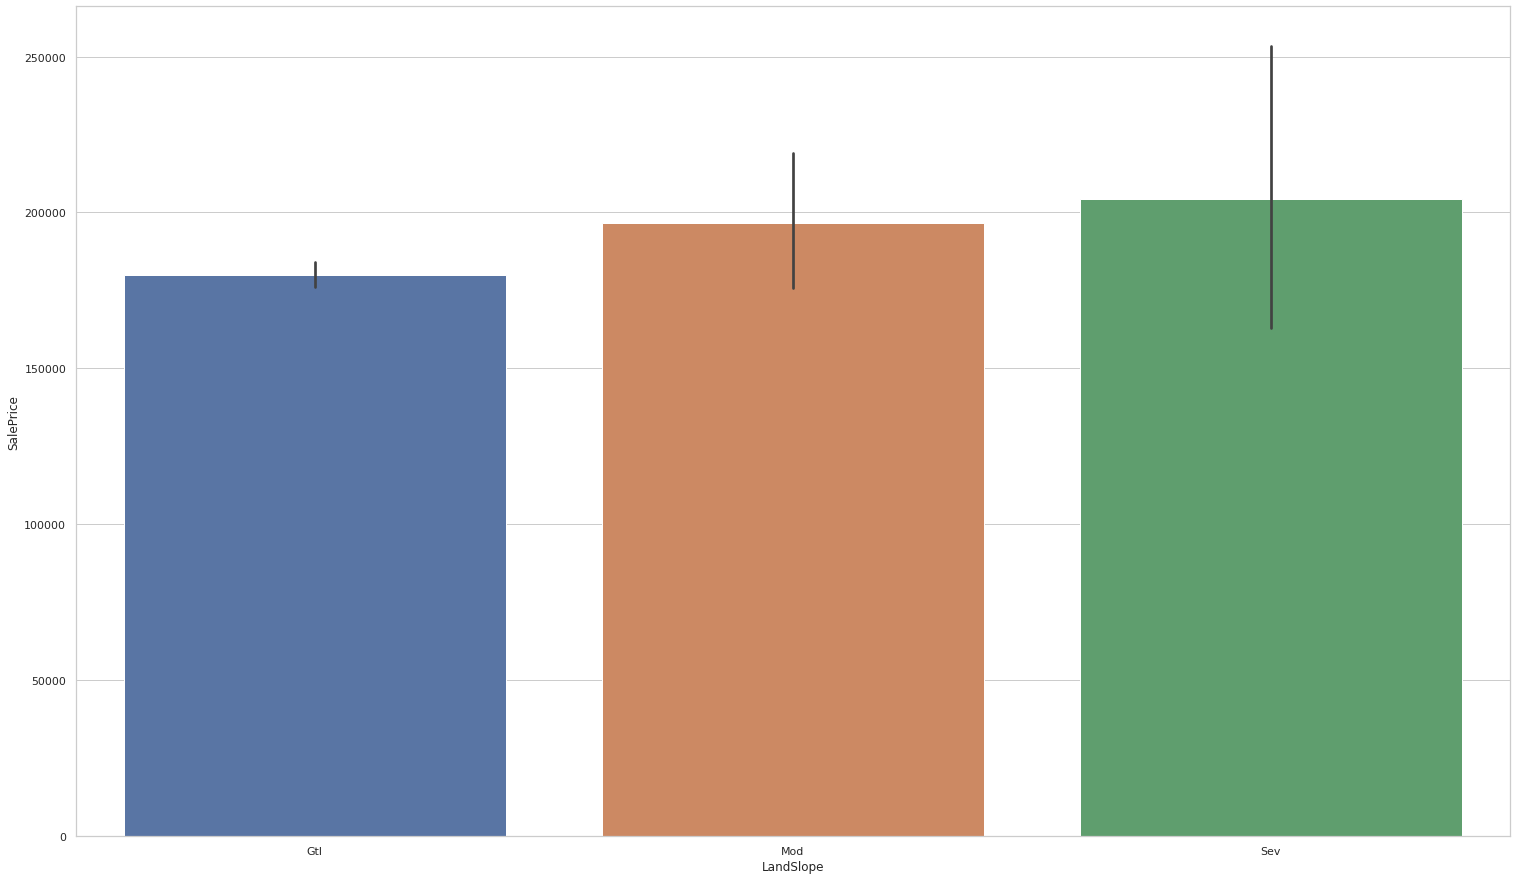

In [37]:
sns.barplot(x='LandSlope', y='SalePrice', data=train_df)

# Visualizing LandContour feature with SalePrice by Bar Plot to assign ranks to each category

<AxesSubplot:xlabel='LandContour', ylabel='SalePrice'>

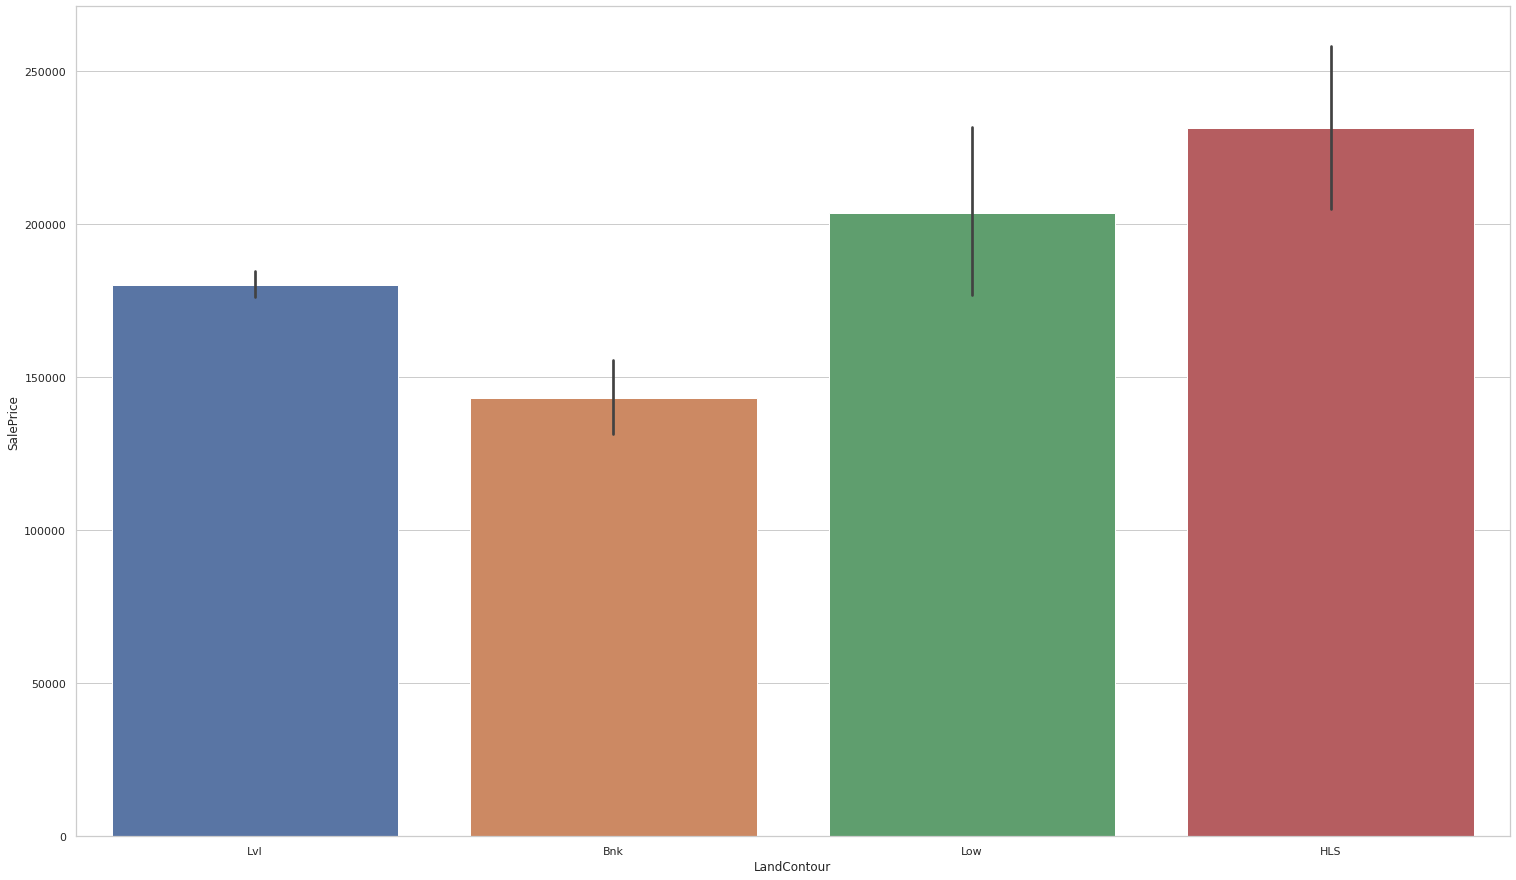

In [38]:
sns.barplot(x='LandContour', y='SalePrice', data=train_df)

# Visualizing Street feature with SalePrice by Bar Plot to assign ranks to each category

<AxesSubplot:xlabel='Street', ylabel='SalePrice'>

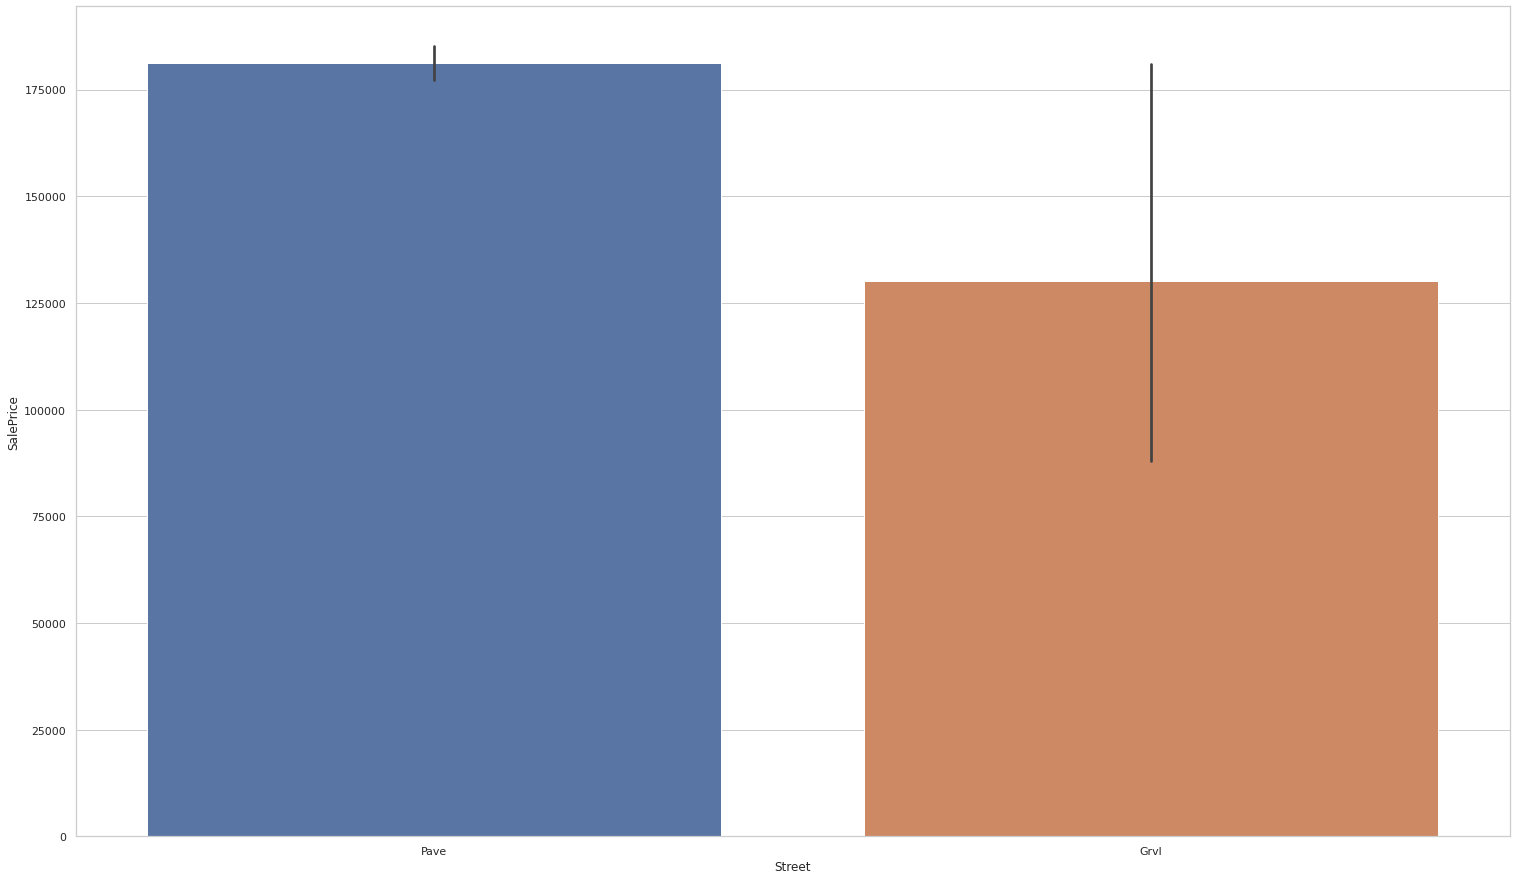

In [39]:
sns.barplot(x='Street', y='SalePrice', data=train_df)

# Visualizing Alley feature with SalePrice by Bar Plot to assign ranks to each category

<AxesSubplot:xlabel='Alley', ylabel='SalePrice'>

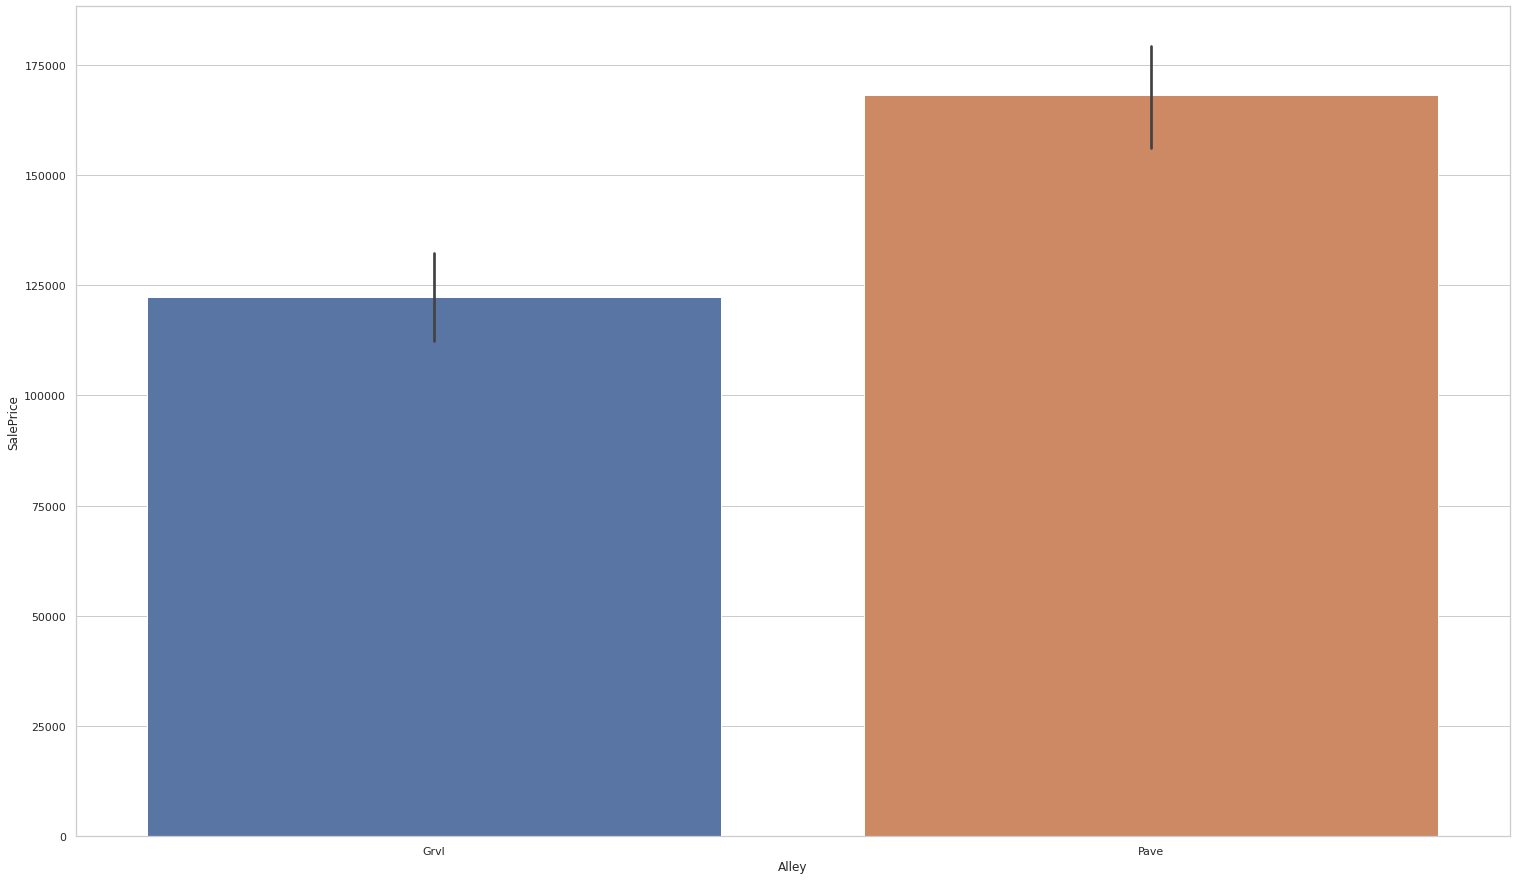

In [40]:
sns.barplot(x='Alley', y='SalePrice', data=train_df)

# Assigning ranks to each distinct category of categorical feature

In [41]:
alley_dict = {'Grvl':1, 'Pave':2}
landslope_dict = {'Gtl':1, 'Mod':2, 'Sev':3}
lotshape_dict = {'IR3':1, 'IR2':2, 'IR1':3, 'Reg':4}
utilities_dict = {'ELO':1, 'NoSeWa':2, 'NoSewr':3, 'AllPub':4}
landslope_dict = {'Gtl':1, 'Mod':2, 'Sev':3}
neighbor_dict = {'MeadowV':1, 'IDOTRR':2, 'BrDale':3, 'BrkSide':4, 'Edwards':5, 'OldTown':6, 'Sawyer':7, 'Blueste':8, 'SWISU':9, 'NPkVill':10, 'NAmes':11, 'Mitchel':12, 'SawyerW':13, 'NWAmes':14, 'Gilbert':15, 'Blmngtn':16, 'CollgCr':17, 'Crawfor':18, 'ClearCr':19, 'Somerst':20, 'Veenker':21, 'Timber':22, 'StoneBr':23, 'NridgHt':24, 'NoRidge':25}
bldg_dict = {'1Fam':1, '2FmCon':2, 'Duplx':3, 'TwnhsE':4, 'TwnhsI':5}
housestyle_dict = {'1Story':1, '1.5Fin':2, '1.5Unf':3, '2Story':4, '2.5Fin':5, '2.5Unf':6, 'SFoyer':7, 'SLvl':8}
qual_dict = {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}
exposure_dict = {'No':1, 'Mn':2, 'Av':3, 'Gd':4}
bsmtfintype_dict = {'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}
heat_dict = {'Floor':1, 'Grav':2, 'Wall':3, 'OthW':4, 'GasW':5, 'GasA':6}
centralac_dict = {'Y':1, 'N':0}
electric_dict = {'Mix':1, 'FuseP':2, 'FuseF':3, 'FuseA':4, 'SBrkr':5}
functional_dict = {'Maj2':1, 'Sev':2, 'Min2':3, 'Min1':4, 'Maj1':5, 'Mod':6, 'Typ':7}
garagetype_dict = {'CarPort':1, 'Detchd':2, '2Types':3, 'Basment':4, 'Attchd':5, 'BuiltIn':6}
garagefin_dict = {'Unf':1, 'RFn':2, 'Fin':3}
pavedrive_dict = {'N':1, 'P':2, 'Y':3}
fence_dict = {'MnWw':1, 'GdWo':2, 'MnPrv':3, 'GdPrv':4}
misc_dict = {'Othr':1, 'Shed':2, 'Gar2':3, 'TenC':4}
saletype_dict = {'Oth':1, 'ConLD':2, 'ConLw':3, 'COD':4, 'WD':5, 'ConLI':6, 'CWD':7, 'Con':8, 'New':9}
salecond_dict = {'AdjLand':1, 'Abnorml':2, 'Family':3, 'Alloca':4, 'Normal':5, 'Partial':6}
foundation_dict = {'Slab':1, 'Brktil':2, 'CBlock':3, 'Stone':4, 'Wood':5, 'PConc':6}
exterior1st_dict = {'BrkComm':1, 'AsphShn':2, 'CBlock':3, 'AsbShng':4, 'MetalSd':5, 'Wd Sdng':6, 'WdShing':7, 'HdBoard':8, 'Stucco': 9, 'Plywood':10, 'BrkFace':11, 'VinylSd':12, 'CemntBd':13, 'Stone':14, 'ImStucc':15}
exterior2nd_dict = {'CBlock':1, 'AsbShng':2, 'Brk Cmn':3, 'AsphShn':4, 'Wd Sdng':5, 'MetalSd':6,'Stucco': 7, 'Stone':8, 'Wd Shng':9, 'HdBoard':10, 'Plywood':11, 'BrkFace':12, 'VinylSd':13, 'CmentBd':14, 'ImStucc':15, 'Other':16}
roofstyle_dict = {'Gambrel':1, 'Gable':2, 'Mansard':3, 'Flat':4, 'Hip':5, 'Shed':6}
roofmatl_dict = {'Roll':1, 'ClyTile':2, 'CompShg':3, 'Metal':4, 'Tar&Grv':5, 'Membran':6, 'WdShake':7, 'WdShngl':8}
masvnrtype_dict = {'BrkCmn':1, 'None':2, 'BrkFace':3, 'Stone':4}
landcontour_dict = {'Bnk':1, 'Lvl':2, 'Low':3, 'HLS':4}
lotconfig_dict = {'Inside':1, 'FR2':2, 'Corner':3, 'FR3':4, 'CulDSac':5}
con2_dict = {'RRNn':1, 'Artery':2, 'Feedr':3, 'RRAn':4, 'Norm':5, 'RRAe':6, 'PosN':7, 'PosA':8}
con1_dict = {'Artery':1, 'RRAe':2, 'Feedr':3, 'Norm':4, 'RRAn':5, 'RRNe':6, 'RRNn':7, 'PosN':8, 'PosA':9}
mszoning_dict = {'C (all)':1, 'RM':2, 'RH':3, 'RL':4, 'FV':5}


# Applying Target Odinal Encoding to all the categorical features

In [42]:
train_df['Alley'] = train_df['Alley'].map(alley_dict)
train_df['Street'] = train_df['Street'].map(alley_dict)
train_df['LandSlope'] = train_df['LandSlope'].map(landslope_dict)
train_df['MSZoning'] = train_df['MSZoning'].map(mszoning_dict)
train_df['MasVnrType'] = train_df['MasVnrType'].map(masvnrtype_dict)
train_df['LotShape'] = train_df['LotShape'].map(lotshape_dict)
train_df['Utilities'] = train_df['Utilities'].map(utilities_dict)
train_df['Neighborhood'] = train_df['Neighborhood'].map(neighbor_dict)
train_df['BldgType'] = train_df['BldgType'].map(bldg_dict)
train_df['HouseStyle'] = train_df['HouseStyle'].map(housestyle_dict)
train_df['ExterQual'] = train_df['ExterQual'].map(qual_dict)
train_df['ExterCond'] = train_df['ExterCond'].map(qual_dict)
train_df['BsmtExposure'] = train_df['BsmtExposure'].map(exposure_dict)
train_df['BsmtFinType1'] = train_df['BsmtFinType1'].map(bsmtfintype_dict)
train_df['BsmtFinType2'] = train_df['BsmtFinType2'].map(bsmtfintype_dict)
train_df['BsmtExposure'] = train_df['BsmtExposure'].map(exposure_dict)
train_df['BsmtCond'] = train_df['BsmtCond'].map(qual_dict)
train_df['BsmtQual'] = train_df['BsmtQual'].map(qual_dict)
train_df['Heating'] = train_df['Heating'].map(heat_dict)
train_df['CentralAir'] = train_df['CentralAir'].map(centralac_dict)
train_df['Electrical'] = train_df['Electrical'].map(electric_dict)
train_df['Functional'] = train_df['Functional'].map(functional_dict)
train_df['GarageType'] = train_df['GarageType'].map(garagetype_dict)
train_df['GarageFinish'] = train_df['GarageFinish'].map(garagefin_dict)
train_df['GarageQual'] = train_df['GarageQual'].map(qual_dict)
train_df['GarageCond'] = train_df['GarageCond'].map(qual_dict)
train_df['PavedDrive'] = train_df['PavedDrive'].map(pavedrive_dict)
train_df['Fence'] = train_df['Fence'].map(fence_dict)
train_df['SaleType'] = train_df['SaleType'].map(saletype_dict)
train_df['SaleCondition'] = train_df['SaleCondition'].map(salecond_dict)
train_df['MiscFeature'] = train_df['MiscFeature'].map(misc_dict)
train_df['Foundation'] = train_df['Foundation'].map(foundation_dict)
train_df['Exterior1st'] = train_df['Exterior1st'].map(exterior1st_dict)
train_df['Exterior2nd'] = train_df['Exterior2nd'].map(exterior2nd_dict)
train_df['RoofStyle'] = train_df['RoofStyle'].map(roofstyle_dict)
train_df['RoofMatl'] = train_df['RoofMatl'].map(roofmatl_dict)
train_df['LandContour'] = train_df['LandContour'].map(landcontour_dict)
train_df['LotConfig'] = train_df['LotConfig'].map(lotconfig_dict)
train_df['Condition1'] = train_df['Condition1'].map(con1_dict)
train_df['Condition2'] = train_df['Condition2'].map(con2_dict)
train_df['HeatingQC'] = train_df['HeatingQC'].map(qual_dict)
train_df['KitchenQual'] = train_df['KitchenQual'].map(qual_dict)
train_df['FireplaceQu'] = train_df['FireplaceQu'].map(qual_dict)

# Handling NA values

In [43]:
train_df['LotFrontage'].isna().sum()

486

In [44]:
train_df['LotFrontage'] = train_df['LotFrontage'].fillna(train_df['LotFrontage'].mode()[0])

In [45]:
train_df['BldgType'] = train_df['BldgType'].fillna(train_df['BldgType'].mode()[0])

In [46]:
train_df['MasVnrType'].unique()

array([ 3.,  2.,  4.,  1., nan])

In [47]:
train_df['MasVnrType'] = train_df['MasVnrType'].fillna(0)

In [48]:
train_df['MasVnrArea'] = train_df['MasVnrArea'].fillna(0)

In [49]:
train_df['Exterior1st'] = train_df['Exterior1st'].fillna(train_df['Exterior1st'].mode()[0])

In [50]:
train_df['Exterior2nd'] = train_df['Exterior2nd'].fillna(train_df['Exterior2nd'].mode()[0])


In [51]:
train_df['Foundation'].isna().sum()

311

In [52]:
train_df['Foundation'].unique()

array([ 6.,  3., nan,  5.,  1.,  4.])

In [53]:
train_df['Foundation'] = train_df['Foundation'].fillna(train_df['Foundation'].mode()[0])

In [54]:
train_df['Electrical'] = train_df['Electrical'].fillna(train_df['Electrical'].mode()[0])

In [55]:
train_df['BsmtUnfSF'].value_counts()

0.0       241
384.0      19
728.0      14
672.0      13
600.0      12
         ... 
257.0       1
1217.0      1
539.0       1
39.0        1
1503.0      1
Name: BsmtUnfSF, Length: 1135, dtype: int64

In [56]:
train_df['BsmtUnfSF'] = train_df['BsmtUnfSF'].fillna(train_df['BsmtUnfSF'].mode()[0])

In [57]:
train_df['BsmtFinSF2'].value_counts()

0.0       2571
180.0        5
294.0        5
435.0        3
483.0        3
          ... 
600.0        1
211.0        1
1031.0       1
438.0        1
297.0        1
Name: BsmtFinSF2, Length: 272, dtype: int64

In [58]:
train_df['BsmtFinSF2'] = train_df['BsmtFinSF2'].fillna(train_df['BsmtFinSF2'].mode()[0])


In [59]:
train_df['BsmtFinType2'].value_counts()

1.0    2493
3.0     105
2.0      87
4.0      68
5.0      52
6.0      34
Name: BsmtFinType2, dtype: int64

In [60]:
train_df['BsmtFinType2'].unique()

array([ 1.,  4., nan,  5.,  3.,  2.,  6.])

In [61]:
train_df['BsmtFinType2'].isna().sum()

80

In [62]:
train_df['BsmtFinType2'] = train_df['BsmtFinType2'].fillna(0)

In [63]:
train_df['BsmtFinType2'].value_counts()

1.0    2493
3.0     105
2.0      87
0.0      80
4.0      68
5.0      52
6.0      34
Name: BsmtFinType2, dtype: int64

In [64]:
train_df['BsmtFinSF1'] = train_df['BsmtFinSF1'].fillna(train_df['BsmtFinSF1'].mode()[0])

In [65]:
train_df['BsmtFinType1'].unique()

array([ 6.,  5.,  1.,  3.,  4., nan,  2.])

In [66]:
train_df['FireplaceQu'].unique()

array([nan,  3.,  4.,  2.,  5.,  1.])

In [67]:
train_df['FireplaceQu'] = train_df['FireplaceQu'].fillna(0)

In [68]:
train_df['Fence'] = train_df['Fence'].fillna(0)

In [69]:
train_df['SaleType'] = train_df['SaleType'].fillna(train_df['SaleType'].mode()[0])

In [70]:
train_df['MiscFeature'] = train_df['MiscFeature'].fillna(0)

In [71]:
train_df.drop('PoolArea', axis=1, inplace=True)
train_df.drop('PoolQC', axis=1, inplace=True)

In [72]:
train_df['GarageArea'].unique()

array([ 548.,  460.,  608.,  642.,  836.,  480.,  636.,  484.,  468.,
        205.,  384.,  736.,  352.,  840.,  576.,  516.,  294.,  853.,
        280.,  534.,  572.,  270.,  890.,  772.,  319.,  240.,  250.,
        271.,  447.,  556.,  691.,  672.,  498.,  246.,    0.,  440.,
        308.,  504.,  300.,  670.,  826.,  386.,  388.,  528.,  894.,
        565.,  641.,  288.,  645.,  852.,  558.,  220.,  667.,  360.,
        427.,  490.,  379.,  297.,  283.,  509.,  405.,  758.,  461.,
        400.,  462.,  420.,  432.,  506.,  684.,  472.,  366.,  476.,
        410.,  740.,  648.,  273.,  546.,  325.,  792.,  450.,  180.,
        430.,  594.,  390.,  540.,  264.,  530.,  435.,  453.,  750.,
        487.,  624.,  471.,  318.,  766.,  660.,  470.,  720.,  577.,
        380.,  434.,  866.,  495.,  564.,  312.,  625.,  680.,  678.,
        726.,  532.,  216.,  303.,  789.,  511.,  616.,  521.,  451.,
       1166.,  252.,  497.,  682.,  666.,  786.,  795.,  856.,  473.,
        398.,  500.,

In [73]:
train_df['GarageCars'].unique()

array([ 2.,  3.,  1.,  0.,  4.,  5., nan])

In [74]:
train_df['GarageType'].value_counts()

5.0    1723
2.0     779
6.0     186
4.0      36
3.0      23
1.0      15
Name: GarageType, dtype: int64

In [75]:
train_df['GarageQual'] = train_df['GarageQual'].fillna(0)
train_df['GarageCond'] = train_df['GarageCond'].fillna(0)
train_df['GarageFinish'] = train_df['GarageFinish'].fillna(0)
train_df['GarageYrBlt'] = train_df['GarageYrBlt'].fillna(0)
train_df['GarageType'] = train_df['GarageType'].fillna(0)

In [76]:
train_df['GarageArea'] = train_df['GarageArea'].fillna(train_df['GarageArea'].mode()[0])
train_df['GarageCars'] = train_df['GarageCars'].fillna(train_df['GarageCars'].mode()[0])

In [77]:
train_df['Functional'].unique()

array([ 7.,  4.,  5.,  3.,  6.,  1.,  2., nan])

In [78]:
train_df['Functional'].value_counts()

7.0    2717
3.0      70
4.0      65
6.0      35
5.0      19
1.0       9
2.0       2
Name: Functional, dtype: int64

In [79]:
train_df['Functional'] = train_df['Functional'].fillna(train_df['Functional'].mode()[0])

In [80]:
train_df['KitchenQual'].unique()

array([ 4.,  3.,  5.,  2., nan])

In [81]:
train_df['KitchenQual'].value_counts()

3.0    1492
4.0    1151
5.0     205
2.0      70
Name: KitchenQual, dtype: int64

In [82]:
train_df['KitchenQual'] = train_df['KitchenQual'].fillna(train_df['KitchenQual'].mode()[0])


In [83]:
train_df['BsmtQual'] = train_df['BsmtQual'].fillna(0)
train_df['BsmtCond'] = train_df['BsmtCond'].fillna(0)

In [84]:
train_df['BsmtFinType1'].value_counts()

1.0    851
6.0    849
5.0    429
3.0    288
4.0    269
2.0    154
Name: BsmtFinType1, dtype: int64

In [85]:
train_df['BsmtFinType1'] = train_df['BsmtFinType1'].fillna(0)

In [86]:
train_df['BsmtExposure'] = train_df['BsmtExposure'].fillna(0)

In [87]:
train_df['BsmtFullBath'].value_counts()

0.0    1705
1.0    1172
2.0      38
3.0       2
Name: BsmtFullBath, dtype: int64

In [88]:
train_df['BsmtFullBath'].unique()

array([ 1.,  0.,  2.,  3., nan])

In [89]:
train_df['BsmtFullBath'] = train_df['BsmtFullBath'].fillna(train_df['BsmtFullBath'].mode()[0])

In [90]:
train_df['BsmtHalfBath'].unique()

array([ 0.,  1.,  2., nan])

In [91]:
train_df['BsmtHalfBath'] = train_df['BsmtHalfBath'].fillna(train_df['BsmtHalfBath'].mode()[0])


In [92]:
train_df['MSZoning'] = train_df['MSZoning'].fillna(train_df['MSZoning'].mode()[0])

In [93]:
train_df['TotalBsmtSF'].unique()

array([ 856., 1262.,  920., ...,  498.,  432., 1381.])

In [94]:
train_df['TotalBsmtSF'].value_counts()

0.0       78
864.0     74
672.0     29
912.0     26
1040.0    25
          ..
1571.0     1
2633.0     1
757.0      1
873.0      1
1381.0     1
Name: TotalBsmtSF, Length: 1058, dtype: int64

In [95]:
train_df['TotalBsmtSF'].isna().sum()

1

In [96]:
train_df['TotalBsmtSF'] = train_df['TotalBsmtSF'].fillna(train_df['TotalBsmtSF'].mode()[0])

In [97]:
train_df['Alley'] = train_df['Alley'].fillna(0)

In [98]:
train_df['Utilities'].isna().sum()

2

In [99]:
train_df['Utilities'].unique()

array([ 4.,  2., nan])

In [100]:
train_df['Utilities'] = train_df['Utilities'].fillna(train_df['Utilities'].mode()[0])

In [101]:
train_df['Alley'].unique()

array([0., 1., 2.])

In [102]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2919 non-null   float64
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   int64  
 5   Alley          2919 non-null   float64
 6   LotShape       2919 non-null   int64  
 7   LandContour    2919 non-null   int64  
 8   Utilities      2919 non-null   float64
 9   LotConfig      2919 non-null   int64  
 10  LandSlope      2919 non-null   int64  
 11  Neighborhood   2919 non-null   int64  
 12  Condition1     2919 non-null   int64  
 13  Condition2     2919 non-null   int64  
 14  BldgType       2919 non-null   float64
 15  HouseStyle     2919 non-null   int64  
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

# Removing categorical features from columns_objects

In [103]:
for i in columns_objects:
    if i not in train_df.columns.values:
        columns_objects.remove(i)

# Checking the Data Distribution of all Numerical features of the dataset

array([[<AxesSubplot:title={'center':'MSSubClass'}>,
        <AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'OverallQual'}>,
        <AxesSubplot:title={'center':'OverallCond'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>],
       [<AxesSubplot:title={'center':'YearRemodAdd'}>,
        <AxesSubplot:title={'center':'MasVnrArea'}>,
        <AxesSubplot:title={'center':'BsmtFinSF1'}>,
        <AxesSubplot:title={'center':'BsmtFinSF2'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>,
        <AxesSubplot:title={'center':'TotalBsmtSF'}>],
       [<AxesSubplot:title={'center':'1stFlrSF'}>,
        <AxesSubplot:title={'center':'2ndFlrSF'}>,
        <AxesSubplot:title={'center':'LowQualFinSF'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'BsmtFullBath'}>,
        <AxesSubplot:title={'center':'BsmtHalfBath'}>],
       [<AxesSubplot:title={'center':'Ful

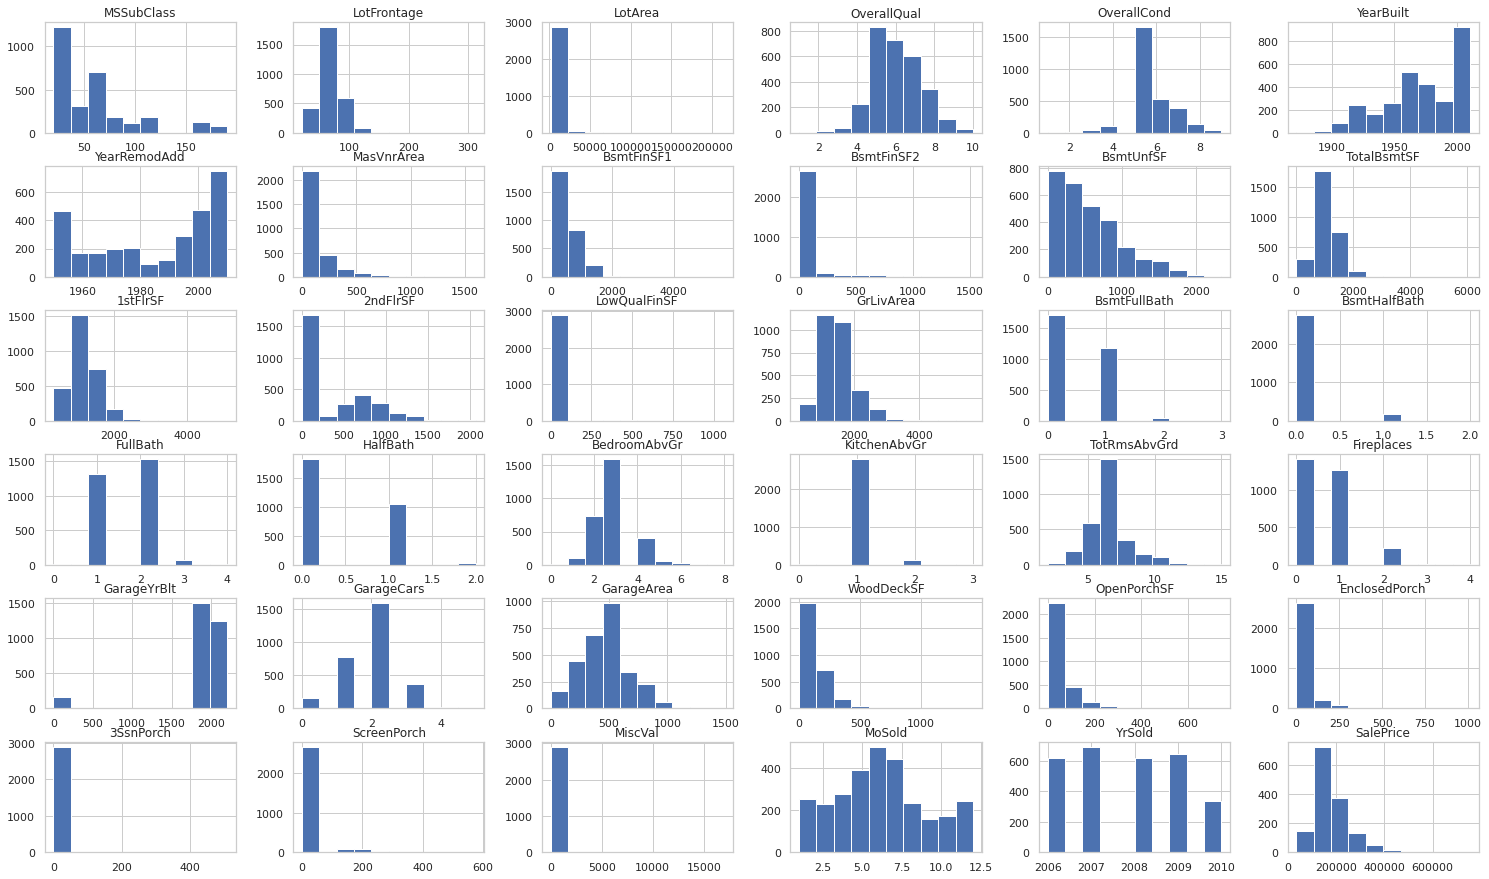

In [104]:
train_df.hist(columns_objects)

# From the above Histograms, we can see that only 'GarageCars, GarageArea, MoSold, TotRmsAbvGrd' follows Gaussian Distribution

# Removing the above mentioned features from the rest of the Numerical features

In [105]:
normalized_cols = ['GarageCars', 'GarageArea', 'MoSold', 'TotRmsAbvGrd']
for i in normalized_cols:
    if i in columns_objects:
        columns_objects.remove(i)

# Removing the SalePrice target feature

In [106]:
columns_objects.remove('SalePrice')

# Feature Scaling

# Applying Normalization i.e. Min Max Scaling on Numerical features which do not follow Gaussian Distribution

In [107]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()

model = min_max_scaler.fit(train_df[columns_objects])

min_max_scaled_data = model.transform(train_df[columns_objects])


In [108]:
min_max_scaled_data.shape

(2919, 31)

# Applying Standardization i.e. Z-Score Normalization on Numerical features which follow Gaussian Distribution

In [109]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()

model = standard_scaler.fit(train_df[normalized_cols])

standard_scaled_data = model.transform(train_df[normalized_cols])

In [110]:
standard_scaled_data.shape

(2919, 4)

# Assigning labels to scaled data and converting to Data Frame

In [111]:
min_max_scaled_df = pd.DataFrame(min_max_scaled_data, columns=columns_objects)
standard_scaled_df = pd.DataFrame(standard_scaled_data, columns=normalized_cols)

In [112]:
min_max_scaled_df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,KitchenAbvGr,Fireplaces,GarageYrBlt,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,YrSold
0,0.235294,0.150685,0.033420,0.666667,0.500,0.949275,0.883333,0.12250,0.125089,0.0,...,0.333333,0.00,0.907567,0.000000,0.082210,0.000000,0.0,0.0,0.000000,0.50
1,0.000000,0.202055,0.038795,0.555556,0.875,0.753623,0.433333,0.00000,0.173281,0.0,...,0.333333,0.25,0.895333,0.209270,0.000000,0.000000,0.0,0.0,0.000000,0.25
2,0.235294,0.160959,0.046507,0.666667,0.500,0.934783,0.866667,0.10125,0.086109,0.0,...,0.333333,0.25,0.906661,0.000000,0.056604,0.000000,0.0,0.0,0.000000,0.50
3,0.294118,0.133562,0.038561,0.666667,0.500,0.311594,0.333333,0.00000,0.038271,0.0,...,0.333333,0.25,0.905301,0.000000,0.047170,0.268775,0.0,0.0,0.000000,0.00
4,0.235294,0.215753,0.060576,0.777778,0.500,0.927536,0.833333,0.21875,0.116052,0.0,...,0.333333,0.25,0.906208,0.134831,0.113208,0.000000,0.0,0.0,0.000000,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,0.823529,0.000000,0.002973,0.333333,0.750,0.710145,0.333333,0.00000,0.000000,0.0,...,0.333333,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00
2915,0.823529,0.000000,0.002776,0.333333,0.500,0.710145,0.333333,0.00000,0.044649,0.0,...,0.333333,0.00,0.892614,0.000000,0.032345,0.000000,0.0,0.0,0.000000,0.00
2916,0.000000,0.476027,0.087406,0.444444,0.750,0.637681,0.766667,0.00000,0.216867,0.0,...,0.333333,0.25,0.888083,0.332865,0.000000,0.000000,0.0,0.0,0.000000,0.00
2917,0.382353,0.140411,0.042726,0.444444,0.500,0.869565,0.700000,0.00000,0.059709,0.0,...,0.333333,0.00,0.000000,0.056180,0.043127,0.000000,0.0,0.0,0.041176,0.00


In [113]:
standard_scaled_df

,GarageCars,GarageArea,MoSold,TotRmsAbvGrd
0,0.306418,0.349364,-1.552184,0.986849
1,0.306418,-0.058991,-0.446925,-0.287758
2,0.306418,0.627787,1.026753,-0.287758
3,1.619830,0.785561,-1.552184,0.349546
4,1.619830,1.685798,2.132012,1.624153
...,...,...,...,...
2914,-2.320407,-2.193574,-0.078505,-0.925062
2915,-1.006994,-0.866421,-0.815344,-0.287758
2916,0.306418,0.479295,1.026753,0.349546
2917,-2.320407,-2.193574,0.289914,-0.287758


# Updating the dataframe with standardized values

In [114]:
train_df[normalized_cols] = standard_scaled_df[normalized_cols]

In [115]:
train_df[normalized_cols]

,GarageCars,GarageArea,MoSold,TotRmsAbvGrd
0,0.306418,0.349364,-1.552184,0.986849
1,0.306418,-0.058991,-0.446925,-0.287758
2,0.306418,0.627787,1.026753,-0.287758
3,1.619830,0.785561,-1.552184,0.349546
4,1.619830,1.685798,2.132012,1.624153
...,...,...,...,...
2914,-2.320407,-2.193574,-0.078505,-0.925062
2915,-1.006994,-0.866421,-0.815344,-0.287758
2916,0.306418,0.479295,1.026753,0.349546
2917,-2.320407,-2.193574,0.289914,-0.287758


# Updating the dataframe with normalized values

In [116]:
train_df[columns_objects] = min_max_scaled_df[columns_objects]

In [117]:
train_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0.235294,4.0,0.150685,0.033420,2,0.0,4,2,4.0,1,...,0.0,0.0,0.0,0.0,0.000000,-1.552184,0.50,5.0,5,208500.0
1,0.000000,4.0,0.202055,0.038795,2,0.0,4,2,4.0,2,...,0.0,0.0,0.0,0.0,0.000000,-0.446925,0.25,5.0,5,181500.0
2,0.235294,4.0,0.160959,0.046507,2,0.0,3,2,4.0,1,...,0.0,0.0,0.0,0.0,0.000000,1.026753,0.50,5.0,5,223500.0
3,0.294118,4.0,0.133562,0.038561,2,0.0,3,2,4.0,3,...,0.0,0.0,0.0,0.0,0.000000,-1.552184,0.00,5.0,2,140000.0
4,0.235294,4.0,0.215753,0.060576,2,0.0,3,2,4.0,2,...,0.0,0.0,0.0,0.0,0.000000,2.132012,0.50,5.0,5,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,0.823529,2.0,0.000000,0.002973,2,0.0,4,2,4.0,1,...,0.0,0.0,0.0,0.0,0.000000,-0.078505,0.00,5.0,5,NaN
2915,0.823529,2.0,0.000000,0.002776,2,0.0,4,2,4.0,1,...,0.0,0.0,0.0,0.0,0.000000,-0.815344,0.00,5.0,2,NaN
2916,0.000000,4.0,0.476027,0.087406,2,0.0,4,2,4.0,1,...,0.0,0.0,0.0,0.0,0.000000,1.026753,0.00,5.0,2,NaN
2917,0.382353,4.0,0.140411,0.042726,2,0.0,4,2,4.0,1,...,0.0,0.0,3.0,2.0,0.041176,0.289914,0.00,5.0,5,NaN


# Separating the train dataframe

In [118]:
train = train_df.iloc[0:1460,]
train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0.235294,4.0,0.150685,0.033420,2,0.0,4,2,4.0,1,...,0.0,0.0,0.0,0.0,0.000000,-1.552184,0.50,5.0,5,208500.0
1,0.000000,4.0,0.202055,0.038795,2,0.0,4,2,4.0,2,...,0.0,0.0,0.0,0.0,0.000000,-0.446925,0.25,5.0,5,181500.0
2,0.235294,4.0,0.160959,0.046507,2,0.0,3,2,4.0,1,...,0.0,0.0,0.0,0.0,0.000000,1.026753,0.50,5.0,5,223500.0
3,0.294118,4.0,0.133562,0.038561,2,0.0,3,2,4.0,3,...,0.0,0.0,0.0,0.0,0.000000,-1.552184,0.00,5.0,2,140000.0
4,0.235294,4.0,0.215753,0.060576,2,0.0,3,2,4.0,2,...,0.0,0.0,0.0,0.0,0.000000,2.132012,0.50,5.0,5,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.235294,4.0,0.140411,0.030929,2,0.0,4,2,4.0,1,...,0.0,0.0,0.0,0.0,0.000000,0.658334,0.25,5.0,5,175000.0
1456,0.000000,4.0,0.219178,0.055505,2,0.0,4,2,4.0,1,...,0.0,0.0,3.0,0.0,0.000000,-1.552184,1.00,5.0,5,210000.0
1457,0.294118,4.0,0.154110,0.036187,2,0.0,4,2,4.0,1,...,0.0,0.0,4.0,2.0,0.147059,-0.446925,1.00,5.0,5,266500.0
1458,0.000000,4.0,0.160959,0.039342,2,0.0,4,2,4.0,1,...,0.0,0.0,0.0,0.0,0.000000,-0.815344,1.00,5.0,5,142125.0


In [119]:
train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0.235294,4.0,0.150685,0.033420,2,0.0,4,2,4.0,1,...,0.0,0.0,0.0,0.0,0.000000,-1.552184,0.50,5.0,5,208500.0
1,0.000000,4.0,0.202055,0.038795,2,0.0,4,2,4.0,2,...,0.0,0.0,0.0,0.0,0.000000,-0.446925,0.25,5.0,5,181500.0
2,0.235294,4.0,0.160959,0.046507,2,0.0,3,2,4.0,1,...,0.0,0.0,0.0,0.0,0.000000,1.026753,0.50,5.0,5,223500.0
3,0.294118,4.0,0.133562,0.038561,2,0.0,3,2,4.0,3,...,0.0,0.0,0.0,0.0,0.000000,-1.552184,0.00,5.0,2,140000.0
4,0.235294,4.0,0.215753,0.060576,2,0.0,3,2,4.0,2,...,0.0,0.0,0.0,0.0,0.000000,2.132012,0.50,5.0,5,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.235294,4.0,0.140411,0.030929,2,0.0,4,2,4.0,1,...,0.0,0.0,0.0,0.0,0.000000,0.658334,0.25,5.0,5,175000.0
1456,0.000000,4.0,0.219178,0.055505,2,0.0,4,2,4.0,1,...,0.0,0.0,3.0,0.0,0.000000,-1.552184,1.00,5.0,5,210000.0
1457,0.294118,4.0,0.154110,0.036187,2,0.0,4,2,4.0,1,...,0.0,0.0,4.0,2.0,0.147059,-0.446925,1.00,5.0,5,266500.0
1458,0.000000,4.0,0.160959,0.039342,2,0.0,4,2,4.0,1,...,0.0,0.0,0.0,0.0,0.000000,-0.815344,1.00,5.0,5,142125.0


# Separating the test dataframe

In [120]:
test = train_df.iloc[1460:2919,].drop('SalePrice', axis=1)
test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1460,0.000000,3.0,0.202055,0.048246,2,0.0,4,2,4.0,1,...,0.0,0.0,0.208333,3.0,0.0,0.000000,-0.078505,1.0,5.0,5
1461,0.000000,4.0,0.205479,0.060609,2,0.0,3,2,4.0,3,...,0.0,0.0,0.000000,0.0,3.0,0.735294,-0.078505,1.0,5.0,5
1462,0.235294,4.0,0.181507,0.058566,2,0.0,3,2,4.0,1,...,0.0,0.0,0.000000,3.0,0.0,0.000000,-1.183764,1.0,5.0,5
1463,0.235294,4.0,0.195205,0.040562,2,0.0,3,2,4.0,1,...,0.0,0.0,0.000000,0.0,0.0,0.000000,-0.078505,1.0,5.0,5
1464,0.588235,4.0,0.075342,0.017318,2,0.0,3,4,4.0,1,...,0.0,0.0,0.250000,0.0,0.0,0.000000,-1.920603,1.0,5.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,0.823529,2.0,0.000000,0.002973,2,0.0,4,2,4.0,1,...,0.0,0.0,0.000000,0.0,0.0,0.000000,-0.078505,0.0,5.0,5
2915,0.823529,2.0,0.000000,0.002776,2,0.0,4,2,4.0,1,...,0.0,0.0,0.000000,0.0,0.0,0.000000,-0.815344,0.0,5.0,2
2916,0.000000,4.0,0.476027,0.087406,2,0.0,4,2,4.0,1,...,0.0,0.0,0.000000,0.0,0.0,0.000000,1.026753,0.0,5.0,2
2917,0.382353,4.0,0.140411,0.042726,2,0.0,4,2,4.0,1,...,0.0,0.0,0.000000,3.0,2.0,0.041176,0.289914,0.0,5.0,5


# Feature Selection

# Spliting the training and testing data

In [121]:
from sklearn.model_selection import train_test_split

X = train.drop('SalePrice', axis=1)
y = train['SalePrice']

X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.3, random_state=0)

In [122]:
X_train.shape, X_validation.shape

((1022, 77), (438, 77))

# Visualizing the correlated features using Heatmap

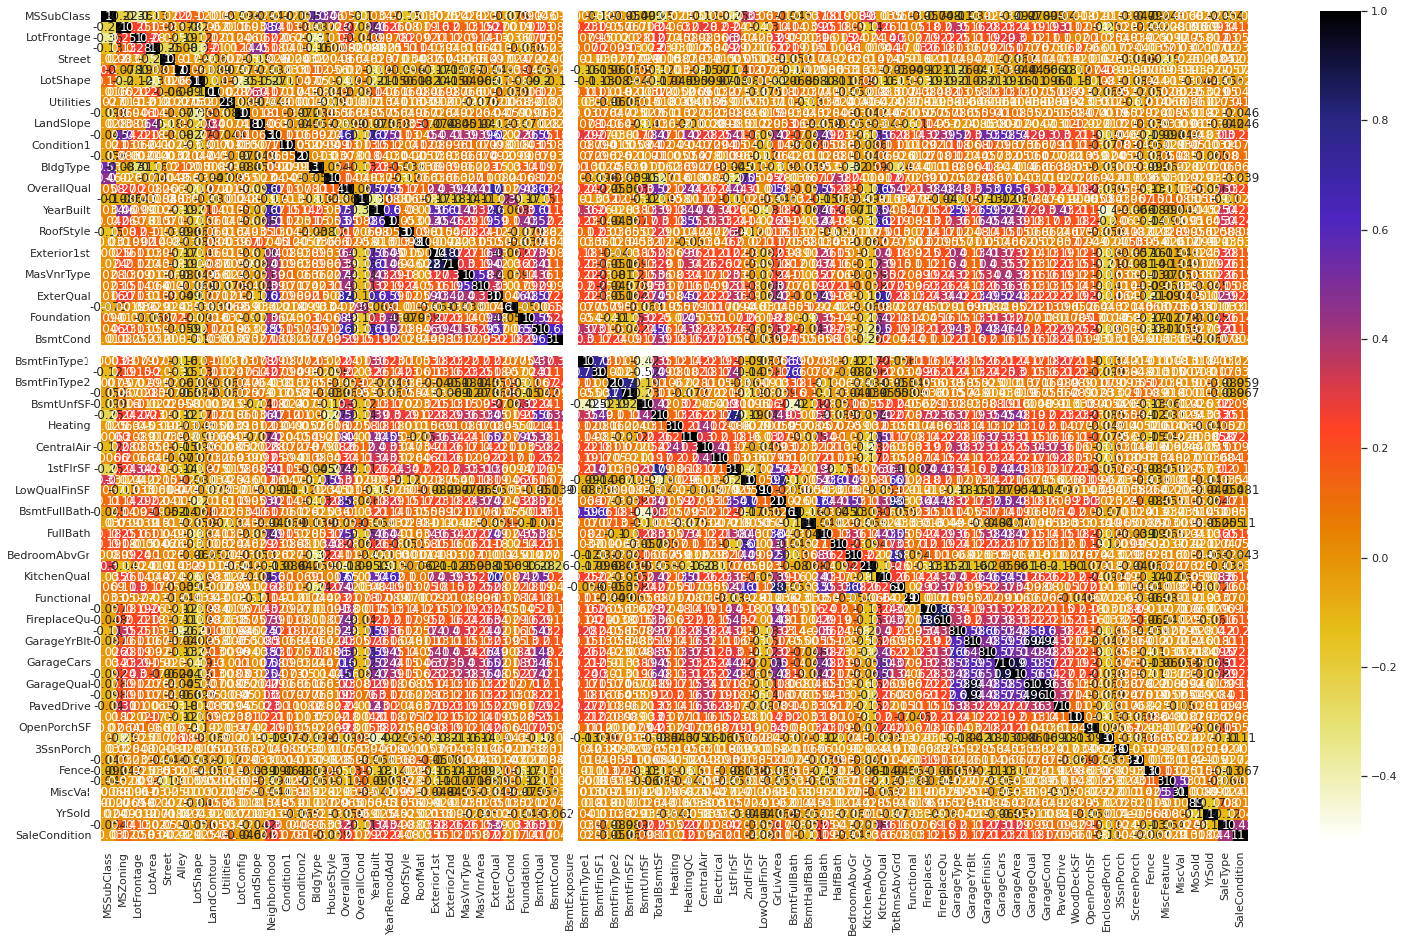

In [123]:
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

# Separating the correlated features

In [124]:
def find_correlation(df, threshold):
    correlated_cols = set()
    correlation_matrix = df.corr()
    
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i,j]) > threshold:
                column_name = correlation_matrix.columns[i]
                correlated_cols.add(column_name)
                
    return correlated_cols

In [125]:
correlated_features = find_correlation(X_train, 0.85)
correlated_features

{'Exterior2nd', 'FireplaceQu', 'GarageArea', 'GarageCond', 'GarageQual'}

In [126]:
X_train.drop(correlated_features, axis=1,inplace=True)
X_validation.drop(correlated_features, axis=1, inplace=True)

In [127]:
X_train.shape, X_validation.shape

((1022, 72), (438, 72))

# Model Training and Testing

# XGBoost Classifier

In [128]:
import xgboost

predictor_model = xgboost.XGBRegressor()
predictor_model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [129]:
y_predict = predictor_model.predict(X_train)
y_predict_validation = predictor_model.predict(X_validation)

# Checking the Mean Absolute Percentage Error

In [130]:
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_percentage_error(y_validation, y_predict_validation)

0.09300787941597022

# CatBoost Classifier

In [131]:
import catboost as cb

In [132]:
model = cb.CatBoostRegressor(loss_function='RMSE')

In [133]:
model.fit(X_train, y_train)

Learning rate set to 0.041084
0:	learn: 75914.0431865	total: 59.6ms	remaining: 59.6s
1:	learn: 74218.4474773	total: 62.6ms	remaining: 31.2s
2:	learn: 72370.0383865	total: 65.4ms	remaining: 21.7s
3:	learn: 70463.9723330	total: 68.2ms	remaining: 17s
4:	learn: 68719.5380355	total: 71ms	remaining: 14.1s
5:	learn: 66924.9150490	total: 73.8ms	remaining: 12.2s
6:	learn: 65449.0086249	total: 76.5ms	remaining: 10.8s
7:	learn: 63854.6178625	total: 79.2ms	remaining: 9.82s
8:	learn: 62430.5397619	total: 82.1ms	remaining: 9.04s
9:	learn: 61041.2777168	total: 85ms	remaining: 8.41s
10:	learn: 59782.1018282	total: 87.7ms	remaining: 7.88s
11:	learn: 58527.5445446	total: 90.3ms	remaining: 7.43s
12:	learn: 57242.4353836	total: 92.9ms	remaining: 7.05s
13:	learn: 56011.3966851	total: 95.5ms	remaining: 6.73s
14:	learn: 54658.7168967	total: 98.2ms	remaining: 6.45s
15:	learn: 53560.9183161	total: 101ms	remaining: 6.19s
16:	learn: 52526.6649789	total: 103ms	remaining: 5.97s
17:	learn: 51515.4395627	total: 106m

In [134]:
y_predict_cb = model.predict(X_validation)

# Testing with Test data

In [135]:
y_pred_test = model.predict(test)

# Checking the Mean Absolute Percentage Error

In [136]:
mean_absolute_percentage_error(y_validation, y_predict_cb)

0.08372915404015832

In [137]:
y_pred_test

array([117333.99272655, 169281.83048779, 191302.15876537, ...,
       176199.55422621, 115694.02990307, 215358.03456065])

# Preparing the sample_submission.csv for Kaggle Submission

In [138]:
test_ids = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

In [139]:
test_ids = test_ids['Id']

In [140]:
test_ids

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [141]:
pred = pd.DataFrame(y_pred_test, columns=['SalePrice'])
pred

,SalePrice
0,117333.992727
1,169281.830488
2,191302.158765
3,194313.266560
4,188008.036071
...,...
1454,80326.910367
1455,78321.378413
1456,176199.554226
1457,115694.029903


In [142]:
pred = pd.concat([test_ids, pred], axis=1)

In [143]:
pred

,Id,SalePrice
0,1461,117333.992727
1,1462,169281.830488
2,1463,191302.158765
3,1464,194313.266560
4,1465,188008.036071
...,...,...
1454,2915,80326.910367
1455,2916,78321.378413
1456,2917,176199.554226
1457,2918,115694.029903


In [144]:
pred.to_csv('sample_submission.csv')